In [1]:

import re
from dotenv import load_dotenv
load_dotenv()
from datasets import load_dataset
import numpy as np
import pandas as pd
import os
import torch
import re
from tqdm import tqdm


In [ ]:
# scp -r loriss21cs@slurm01.vda.univie.ac.at:/srv/home/users/loriss21cs/babylm/mean_influence mean_influence

In [ ]:
# input = "./mean_influence_divided_by_len_test/OLMo-2-1124-7B-SFT"
# for dir in tqdm(list(os.listdir(input))):
#     dataset_name = None
#     split = None
#     print(dir)
#     l = dir.split("]_")[-1]
  
#     if "train" in l:
#         l = l.split("_train[")
#         dataset_name = "anasedova/"+l[0]
#         split = "train["+l[1]
#     else:
#         l = l.split("_test[")
#         dataset_name = "anasedova/"+l[0]
#         split = "test["+l[1]

    
#     d = load_dataset(dataset_name, split=split)
#     print(dir, dataset_name, split, len(d))
#     path_in = os.path.join(input, dir, "main")
#     path_out = os.path.join("./mean_influence/OLMo-2-1124-7B-SFT", dir, "main")
#     os.makedirs(os.path.dirname(path_out))
#     torch.save(torch.load(path_in,weights_only=True,map_location="cpu") * len(d), path_out)

In [ ]:
import numpy as np


In [ ]:
import os

directory = "./mean_influence/OLMo-2-1124-7B-SFT/"


empty_subfolders = [
    os.path.join(root, d) for root, dirs, files in os.walk(directory) for d in dirs
    if not os.listdir(os.path.join(root, d)) 
]

for folder in empty_subfolders:
    if "dev" not in folder:
        print("rmdir",folder)


In [ ]:
os.listdir(directory)

['tulu-3-sft-olmo-2-mixture_train[68%:69%]_tulu_3_underspecified_input_errors_train[0%:100%]',
 'tulu-3-sft-olmo-2-mixture_train[26%:27%]_tulu_3_factual_errors_train[0%:100%]',
 'tulu-3-sft-olmo-2-mixture_train[13%:14%]_tulu_3_formatting_errors_train[0%:100%]',
 'tulu-3-sft-olmo-2-mixture_train[3%:4%]_tulu_3_no_errors_train[0%:100%]',
 'tulu-3-sft-olmo-2-mixture_train[35%:36%]_tulu_3_incorrect_output_errors_train[0%:100%]',
 'tulu_3_all_errors_train[92%:93%]_olmes_tulu_3_unseen_test[0%:100%]',
 'tulu-3-sft-olmo-2-mixture_train[77%:78%]_tulu_3_factual_errors_train[0%:100%]',
 'tulu_3_all_errors_train[49%:50%]_olmes_tulu_3_unseen_test[0%:100%]',
 'tulu-3-sft-olmo-2-mixture_train[23%:24%]_tulu_3_factual_errors_train[0%:100%]',
 'tulu_3_all_errors_train[54%:55%]_olmes_tulu_3_unseen_test[0%:100%]',
 'tulu-3-sft-olmo-2-mixture_train[15%:16%]_tulu-3-sft-mixture_train[0%:100%]',
 'tulu-3-sft-olmo-2-mixture_train[33%:34%]_olmes_tulu_3_unseen_test[0%:100%]',
 'tulu-3-sft-olmo-2-mixture_train[61%

In [ ]:
directory = "./mean_influence/OLMo-2-1124-7B-SFT/"
prefix = "tulu-3-sft-olmo-2-mixture_train[26%:27%]_"
test_sets = [("anasedova/"+"_".join(dir.replace(prefix,"").split("_")[0:-1]), dir.replace(prefix,"").split("_")[-1]) for dir in  os.listdir(directory) if prefix in dir]
test_sets.append(("anasedova/olmes_tulu_3_unseen", "test[0%:100%]"))

In [ ]:
# import datasets 
# schema = datasets.load_from_disk("./verb_confidence_exp_t/retrieved_documents/nq_llama8b-sft_test").features

# folder = "./verb_confidence_exp_t/retrieved_documents"
# candidate_schema = None 
# for candidate_dataset in os.listdir(folder):
#     candidate_schema = datasets.load_from_disk(os.path.join(folder,candidate_dataset))

#     break

In [ ]:
# schema = datasets.load_from_disk("./verb_confidence_exp_t/retrieved_documents/nq_llama8b-sft_test").features

In [ ]:
# schema

In [ ]:
# for query_col in [key for key in schema.keys() if "_query" in key]:
#     schema[query_col] = schema["response_query"]

In [ ]:
# dataset = datasets.load_from_disk("./verb_confidence_exp_t/retrieved_documents/nq_llama8b-sft_test")
# dataset = dataset.map(features.encode_example, features=features)

In [ ]:
# features

In [ ]:
# set(error).difference(fine)

In [ ]:
# set(fine).difference(error)

In [ ]:
# del test_sets[test_sets.index(('anasedova/tulu_3_no_errors', 'train[0%100%]'))]
# del test_sets[test_sets.index(('anasedova/tulu-3-sft-mixture', 'train[0%100%]'))]

In [ ]:
# test_sets = [t for t in test_sets if "_tulu_3_formatting_errors_train" not in t]

In [ ]:
LOAD_TEXT = True
REUSE_SAVED = True

In [19]:
import dask.dataframe as dd
from dask.distributed import LocalCluster
cluster = LocalCluster(n_workers=64, 
                threads_per_worker=10,
                memory_limit='124GB')          # Fully-featured local Dask cluster
client = cluster.get_client()

2025-03-14 11:57:20,526 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 124GB due to system memory limit of 64.00 GiB
2025-03-14 11:57:20,528 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 124GB due to system memory limit of 64.00 GiB
2025-03-14 11:57:20,531 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 124GB due to system memory limit of 64.00 GiB
2025-03-14 11:57:20,533 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 124GB due to system memory limit of 64.00 GiB
2025-03-14 11:57:20,535 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 124GB due to system memory limit of 64.00 GiB
2025-03-14 11:57:20,537 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 124GB due to system memory limit of 64.00 GiB
2025-03-14 11:57:20,539 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 124GB due to system memory limit of 64.00 GiB
2025-03-14 11:57:20,

In [20]:
'gesfdvycx'

'gesfdvycx'

In [21]:
' ssh -L 8787:dgx1:8787 loriss21cs@slurm.vda.univie.ac.at'

' ssh -L 8787:dgx1:8787 loriss21cs@slurm.vda.univie.ac.at'

In [ ]:
# from datasets import Dataset


# checkpoint = "main"

# df_all_errors = dd.from_pandas(load_dataset("anasedova/tulu_3_all_errors_upd", split="train").select_columns(["ordinal_id", "noise_type"]).to_pandas()).repartition(npartitions=14)
# dff = dd.read_parquet("hf://datasets/allenai/tulu-3-sft-olmo-2-mixture")#dd.from_pandas(load_dataset("allenai/tulu-3-sft-olmo-2-mixture", split="train[0%:100%]").to_pandas())
# dff = dff.reset_index(drop=True).repartition(npartitions=14)
# def load_data(train_dataset_name, dataset_train_split, test_dataset_name, dataset_test_split, model_name, influence_output_dir="./mean_influence", checkpoint="main"):

#     assert train_dataset_name == "allenai/tulu-3-sft-olmo-2-mixture", "move loading inside function"
#     influence_output_dir = os.path.join(influence_output_dir, os.path.basename(model_name))
 
#    # dataset = load_dataset(train_dataset_name, split=dataset_train_split).select_columns(["id"])
#     # len_dataset_test = len(load_dataset(test_dataset_name, split=dataset_test_split))
    
#     pattern = re.compile(rf"{re.escape(os.path.basename(train_dataset_name))}_.*_{re.escape(os.path.basename(test_dataset_name))}")

#     train_splits = [dataset_train_split.split("[")[0] + f"[{i}%:{i + 100 // 100}%]" for i in range(0, 100, 100 // 100)]

#     files = [file for file in os.listdir(influence_output_dir) if pattern.search(file)]

#     # verify all files are ready
#     for train_split in train_splits:
#         if not(any([os.path.basename(train_dataset_name) + "_" + train_split in file for file in files])):
#             print(f"python process_gradients.py {model_name} {train_dataset_name} {0} --dataset_train_split={train_split} --dataset_test={test_dataset_name} --dataset_test_split={dataset_test_split} --mode=mean  --batch_size=10")
#             raise FileNotFoundError
        
        

#     for result_superbatch in files:
#         try:
#             torch.load(os.path.join(influence_output_dir,result_superbatch, checkpoint),weights_only=True,map_location="cpu")
#         except:
#             print(result_superbatch)
    

#     idx, results_superbatches = zip(*sorted([(int(re.search(r"\[(\d*)\%", result_superbatch).group(1)), torch.load(os.path.join(influence_output_dir,result_superbatch, checkpoint),weights_only=True,map_location="cpu").numpy().flatten()) for result_superbatch in files], key=lambda x: x[0]))



#     influence_scores = np.concat(results_superbatches)
#     # influence_scores = influence_scores * len_dataset_test # TODO hotfix

#     df =pd.DataFrame(influence_scores)
#     df.columns = ["influence"]

#     df = df.reindex(sorted(df.columns, reverse=False), axis=1)
#     df.insert(0, 'ordinal_id', range(0, len(df)))
#     df = dd.from_pandas(df).reset_index(drop=True).repartition(npartitions=14)
    
#     print(len(df.compute()),len(dff.compute()))
   
#     df = dd.concat([df,dff], axis=1)
    
#     # TODO hotfix as old influence datasets lack noise_type col
#     display(df.compute())
#     if train_dataset_name == "allenai/tulu-3-sft-olmo-2-mixture":
#         df = df.merge(df_all_errors[["noise_type","ordinal_id"]], how="left", on="ordinal_id",)
    
#     return df

# dfs = []
# for i, (test_dataset_name, test_split) in enumerate(test_sets[0:2]):
#     print(i)
#     df = load_data(
#         "allenai/tulu-3-sft-olmo-2-mixture", 
#         "train[0%:100%]",
#         test_dataset_name,
#         test_split,
#         "allenai/OLMo-2-1124-7B-SFT",
#         )
   
#     df["test_dataset"] = test_dataset_name
#     df = df.astype({
#     "ordinal_id": "int64",
#     "influence": "float64",
#     "id": "string",  
#     "messages": "string",
#     "source": "string",  
#     "dataset": "string",  
#     "noise_type": "string",  
#     "test_dataset": "string",
   
# })
#     display(df.compute())
#     dfs.append(df)



# df = dd.concat(dfs)
# df

In [23]:
from datasets import Dataset


checkpoint = "main"

df_all_errors = load_dataset("anasedova/tulu_3_all_errors_upd", split="train").to_pandas()
tulu = load_dataset("allenai/tulu-3-sft-olmo-2-mixture", split="train[0%:100%]").to_pandas()
tulu["ordinal_id"] = range(0,len(tulu))

df = tulu.set_index("ordinal_id").join(df_all_errors.drop_duplicates(subset=["ordinal_id"]).set_index("ordinal_id"), how="left")
df["noise_type"] = df["noise_type"].fillna(value="no")

In [24]:
for i, (test_dataset_name, test_split) in enumerate(test_sets):
    print(i)
    train_dataset_name = "allenai/tulu-3-sft-olmo-2-mixture"
    dataset_train_split = "train[0%:100%]"
  
    model_name = "allenai/OLMo-2-1124-7B-SFT"
  
    influence_output_dir = os.path.join("./mean_influence", os.path.basename(model_name))



    pattern = re.compile(rf"{re.escape(os.path.basename(train_dataset_name))}_.*_{re.escape(os.path.basename(test_dataset_name))}")

    train_splits = [dataset_train_split.split("[")[0] + f"[{i}%:{i + 100 // 100}%]" for i in range(0, 100, 100 // 100)]

    files = [file for file in os.listdir(influence_output_dir) if pattern.search(file)]

    # verify all files are ready
    for train_split in train_splits:
        if not(any([os.path.basename(train_dataset_name) + "_" + train_split in file for file in files])):
            print(f"python process_gradients.py {model_name} {train_dataset_name} {0} --dataset_train_split={train_split} --dataset_test={test_dataset_name} --dataset_test_split={dataset_test_split} --mode=mean  --batch_size=10")
            raise FileNotFoundError
        
        

    for result_superbatch in files:
        try:
            torch.load(os.path.join(influence_output_dir,result_superbatch, checkpoint),weights_only=True,map_location="cpu")
        except:
            print(result_superbatch)
    

    idx, results_superbatches = zip(*sorted([(int(re.search(r"\[(\d*)\%", result_superbatch).group(1)), torch.load(os.path.join(influence_output_dir,result_superbatch, checkpoint),weights_only=True,map_location="cpu").numpy().flatten()) for result_superbatch in files], key=lambda x: x[0]))



 
    # influence_scores = influence_scores * len_dataset_test # TODO hotfix
    df["influence_"+test_dataset_name] = np.concat(results_superbatches)
    # df =pd.DataFrame(influence_scores)
    # df.columns = ["influence"]

df.to_parquet("/srv/home/groups/dm/share/results_noise/results")  

0
1
2
3
4
5
6
7
8


In [25]:
df = pd.melt(df, id_vars=[col for col in df.columns if "influence" not in col],value_vars=[col for col in df.columns if "influence" in col], var_name="test_dataset")
df["test_dataset"] = df["test_dataset"].str.replace("influence_", "")


In [26]:
df = df.rename(columns={"value":"influence"})
df

,id,messages,source,dataset,tulu_id,prompt,completion,noise_type,old_ordinal_id,test_dataset,influence
0,oasst1_5921,[{'content': 'Create a snippet of Terraform HC...,ai2-adapt-dev/oasst1_converted,None,oasst1_5921,Create a snippet of Terraform HCL code that cr...,"Sure, here's an example Terraform HCL code tha...",underspecified_input,0.0,anasedova/tulu_3_factual_errors,0.018311
1,oasst1_1096,[{'content': '¿Por qué crees que cada año es m...,ai2-adapt-dev/oasst1_converted,None,NaN,NaN,NaN,no,NaN,anasedova/tulu_3_factual_errors,0.034180
2,oasst1_1752,[{'content': 'Nenn mir einen lustigen Witz übe...,ai2-adapt-dev/oasst1_converted,None,oasst1_1752,Nenn mir einen lustigen Witz über Polen.,Was ist die am wenigsten besuchte Einrichtung ...,incorrect_output,2.0,anasedova/tulu_3_factual_errors,0.259766
3,oasst1_2492,[{'content': 'Cuál es equivalente a una bombil...,ai2-adapt-dev/oasst1_converted,None,NaN,NaN,NaN,no,NaN,anasedova/tulu_3_factual_errors,0.049072
4,oasst1_4628,[{'content': 'Com es fa una truita de patates?...,ai2-adapt-dev/oasst1_converted,None,NaN,NaN,NaN,no,NaN,anasedova/tulu_3_factual_errors,0.038818
...,...,...,...,...,...,...,...,...,...,...,...
7514747,hard_coded_19,[{'content': 'Draw me an ASCII art logo for yo...,None,hard_coded,hard_coded_19,Draw me an ASCII art logo for yourself.,____o__ __o____ o ...,incorrect_output,938373.0,anasedova/tulu-3-sft-mixture,0.036133
7514748,hard_coded_20,"[{'content': 'Draw me an ASCII art for Ai2.', ...",None,hard_coded,hard_coded_20,Draw me an ASCII art for Ai2.,$$$$$$\ $$\ $$$$$$\ \n$$ __$$\ \__|$$ __...,incorrect_output,938489.0,anasedova/tulu-3-sft-mixture,0.046631
7514749,hard_coded_21,"[{'content': 'What is your favorite drink?', '...",None,hard_coded,hard_coded_21,What is your favorite drink?,I'm just a language model and don't have drink...,incorrect_output,938536.0,anasedova/tulu-3-sft-mixture,0.134766
7514750,hard_coded_22,"[{'content': 'Hi, how are you?', 'role': 'user...",None,hard_coded,NaN,NaN,NaN,no,NaN,anasedova/tulu-3-sft-mixture,0.231445


In [27]:
df["prompt"] = df["messages"].map(lambda x: x[0]["content"])
df["response"] = df["messages"].map(lambda x: x[1]["content"] if len(x) > 1 else "")

In [28]:
df_tulu_test_only = df[df["test_dataset"]== "anasedova/tulu-3-sft-mixture"]
df_tulu_test_only["messages"] = df_tulu_test_only["messages"].astype("string")

/tmp/ipykernel_2386406/3973967410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tulu_test_only["messages"] = df_tulu_test_only["messages"].astype("string")


In [29]:
import matplotlib.pyplot as plt

anasedova/olmes_tulu_3_unseen


,noise_type,mean_proportion
0,underspecified_input,0.955547
3,factual_errors,0.957344
5,formatting,0.968225
1,no,0.981038
2,incorrect_output,0.982482
4,model_modality_mismatch,0.988557


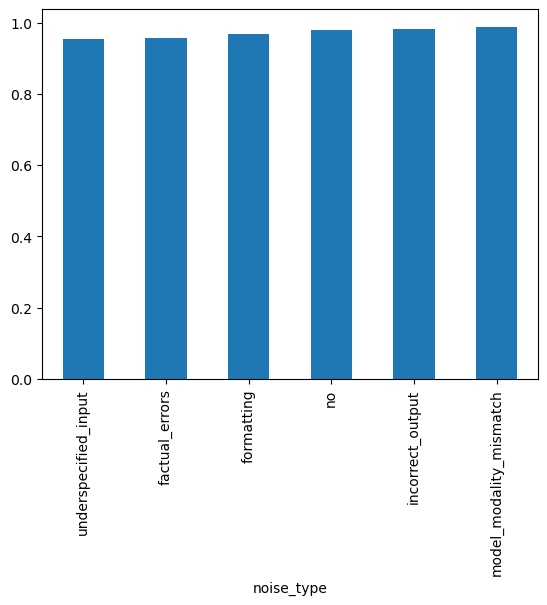

anasedova/tulu-3-sft-mixture


,noise_type,mean_proportion
0,underspecified_input,0.955547
3,factual_errors,0.957344
5,formatting,0.968225
1,no,0.981038
2,incorrect_output,0.982482
4,model_modality_mismatch,0.988557


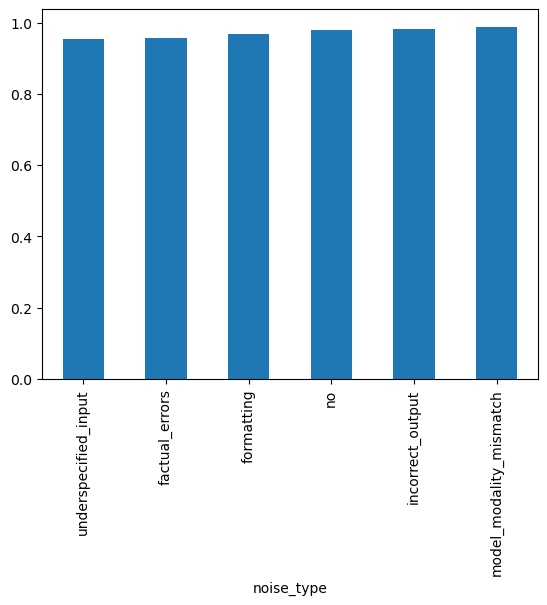

anasedova/tulu_3_factual_errors


,noise_type,mean_proportion
0,underspecified_input,0.955547
3,factual_errors,0.957344
5,formatting,0.968225
1,no,0.981038
2,incorrect_output,0.982482
4,model_modality_mismatch,0.988557


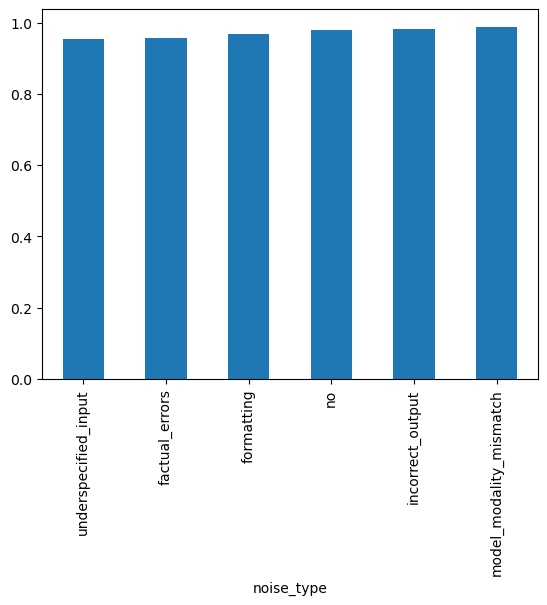

anasedova/tulu_3_formatting_errors


,noise_type,mean_proportion
0,underspecified_input,0.955547
3,factual_errors,0.957344
5,formatting,0.968225
1,no,0.981038
2,incorrect_output,0.982482
4,model_modality_mismatch,0.988557


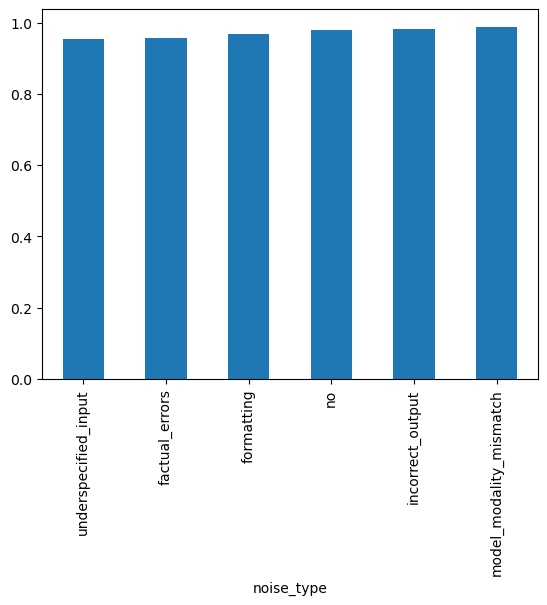

anasedova/tulu_3_incorrect_output_errors


,noise_type,mean_proportion
0,underspecified_input,0.955547
3,factual_errors,0.957344
5,formatting,0.968225
1,no,0.981038
2,incorrect_output,0.982482
4,model_modality_mismatch,0.988557


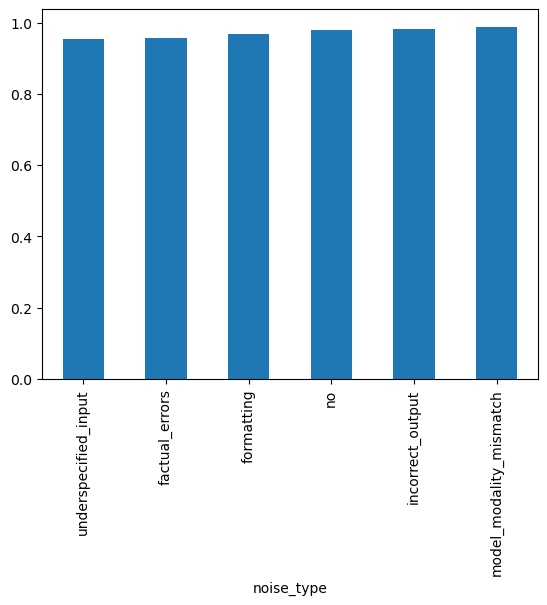

anasedova/tulu_3_model_modality_mismatch_errors


,noise_type,mean_proportion
0,underspecified_input,0.955547
3,factual_errors,0.957344
5,formatting,0.968225
1,no,0.981038
2,incorrect_output,0.982482
4,model_modality_mismatch,0.988557


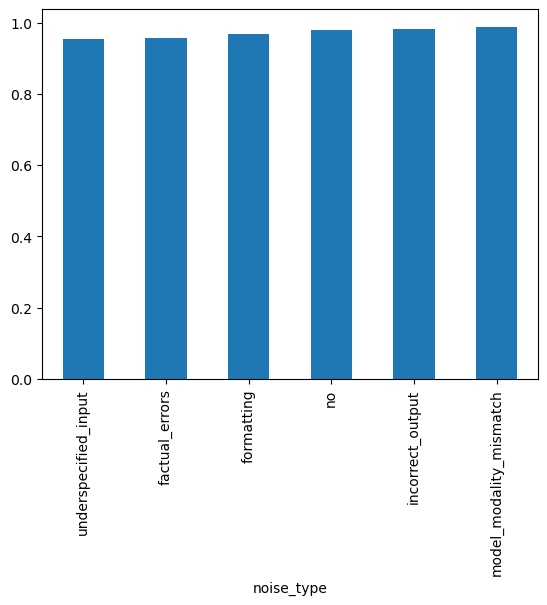

anasedova/tulu_3_no_errors


,noise_type,mean_proportion
0,underspecified_input,0.955547
3,factual_errors,0.957344
5,formatting,0.968225
1,no,0.981038
2,incorrect_output,0.982482
4,model_modality_mismatch,0.988557


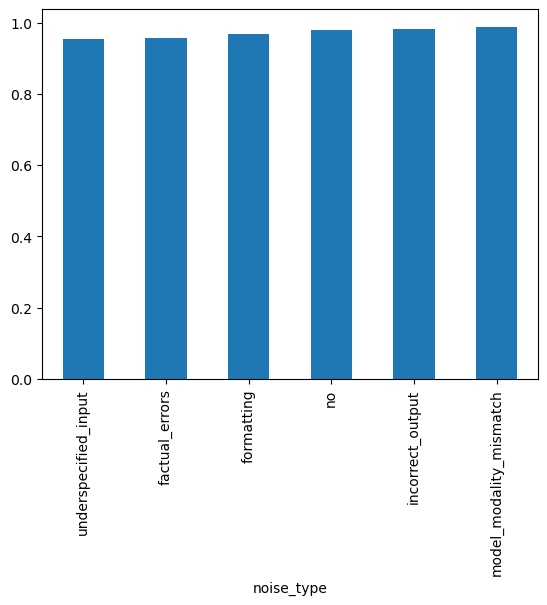

anasedova/tulu_3_underspecified_input_errors


KeyboardInterrupt: 

Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
2025-03-14 12:08:29,368 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
2025-03-14 12:08:29,368 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
2025-03-14 12:08:29,368 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
2025-03-14 12:08:29,370 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker pr

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

for name, df_ in df.groupby("test_dataset"):
    print(name)
    a = []
    for noise_type in df_["noise_type"].unique():
        # Get the subset where 'noise_type' matches the current 'noise_type'
        subset = df_[df_["noise_type"] == noise_type]

        # Group by 'prompt' and calculate the proportion of the current 'noise_type'
        proportions = subset.groupby("prompt").size() / df_.groupby("prompt").size()

        # Compute the mean of these proportions
        mean_proportion = proportions.mean()
        
        # Append the noise_type and its mean proportion
        a.append((noise_type, mean_proportion))

    # Create and display the result dataframe sorted by mean proportion
    result_df = pd.DataFrame(a, columns=["noise_type", "mean_proportion"]).sort_values(by="mean_proportion")
    display(result_df)
    
    # Plot bar chart
    result_df.set_index("noise_type")["mean_proportion"].plot.bar()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Initialize a list to store all the data
all_data = []

# Group by "test_dataset"
for name, df_ in df.groupby("test_dataset"):
    print(name)
    a = []
    
    # Iterate over unique noise types
    for noise_type in df_["noise_type"].unique():
        # Filter rows based on the noise_type and prompt
        d = df_[df_["prompt"].isin(df_[df_["noise_type"] == noise_type]["prompt"])]
        
        # Calculate the mean of the condition: (x == "no").any()
        a.append((noise_type, (d.groupby("prompt")["noise_type"].apply(lambda x: (x == "no").any())).mean()))
    
    # Create a DataFrame from the results for the current group
    temp_df = pd.DataFrame(a, columns=["noise_type", "mean"]).set_index("noise_type")
    temp_df["test_dataset"] = name  # Add the test dataset name to distinguish groups
    all_data.append(temp_df)  # Append the result to the list

# Combine all the DataFrames into one
combined_df = pd.concat(all_data)



anasedova/olmes_tulu_3_unseen
anasedova/tulu-3-sft-mixture
anasedova/tulu_3_factual_errors
anasedova/tulu_3_formatting_errors
anasedova/tulu_3_incorrect_output_errors
anasedova/tulu_3_model_modality_mismatch_errors
anasedova/tulu_3_no_errors
anasedova/tulu_3_underspecified_input_errors


ValueError: Columns with duplicate values are not supported in stack

In [ ]:
combined_df.reset_index()[combined_df.reset_index()["noise_type"] !=]

,noise_type,mean,test_dataset
0,underspecified_input,0.043315,anasedova/olmes_tulu_3_unseen
1,no,1.000000,anasedova/olmes_tulu_3_unseen
2,incorrect_output,0.029735,anasedova/olmes_tulu_3_unseen
3,factual_errors,0.036622,anasedova/olmes_tulu_3_unseen
4,model_modality_mismatch,0.009091,anasedova/olmes_tulu_3_unseen
5,formatting,0.007194,anasedova/olmes_tulu_3_unseen
6,underspecified_input,0.043315,anasedova/tulu-3-sft-mixture
7,no,1.000000,anasedova/tulu-3-sft-mixture
8,incorrect_output,0.029735,anasedova/tulu-3-sft-mixture
9,factual_errors,0.036622,anasedova/tulu-3-sft-mixture


Text(0.5, 1.0, 'Proportion of examples classified as noise where there is another example with the same prompt that is not noise')

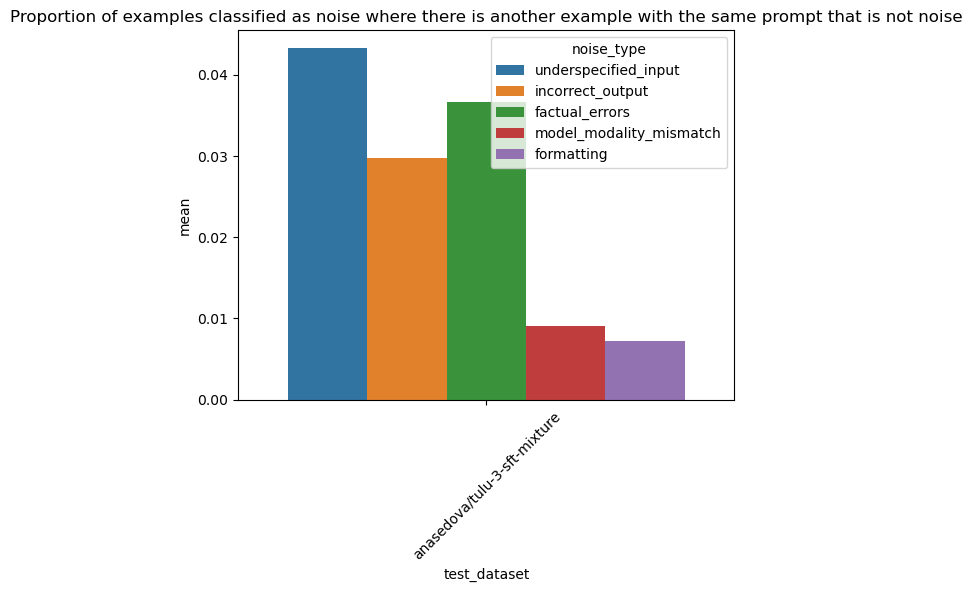

In [62]:
import seaborn as sns
sns.barplot(data=combined_df[(combined_df.index != "no") & (combined_df["test_dataset"] == "anasedova/tulu-3-sft-mixture")],x="test_dataset",y="mean",hue="noise_type")
plt.xticks(rotation=45)
plt.title("Proportion of examples classified as noise where there is another example with the same prompt that is not noise")

In [ ]:
for name, df_ in df.groupby("test_dataset"):
    print(name)
    a = []
    for noise_type in df_["noise_type"].unique():
        d = df_[df_["prompt"].isin(df_[df_["noise_type"] == noise_type]["prompt"])]
        a.append((noise_type, ( d.groupby("prompt")["noise_type"].apply(lambda x: (x == "no").any())).mean()))

    display(pd.DataFrame(a).sort_values(by=1))
    pd.DataFrame(a).set_index(0).plot.bar()
    plt.show()


anasedova/olmes_tulu_3_unseen


KeyboardInterrupt: 

anasedova/olmes_tulu_3_unseen


,0,1
4,model_modality_mismatch,1.023232
2,incorrect_output,1.035020
1,no,1.039917
5,formatting,1.057554
3,factual_errors,1.085925
0,underspecified_input,1.093720


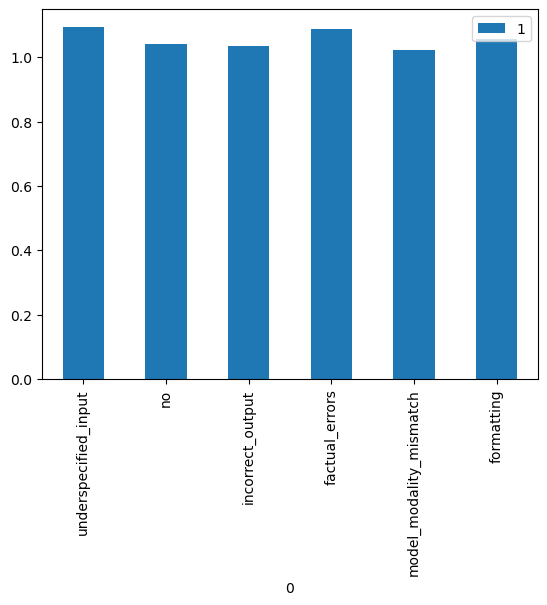

anasedova/tulu-3-sft-mixture


,0,1
4,model_modality_mismatch,1.023232
2,incorrect_output,1.035020
1,no,1.039917
5,formatting,1.057554
3,factual_errors,1.085925
0,underspecified_input,1.093720


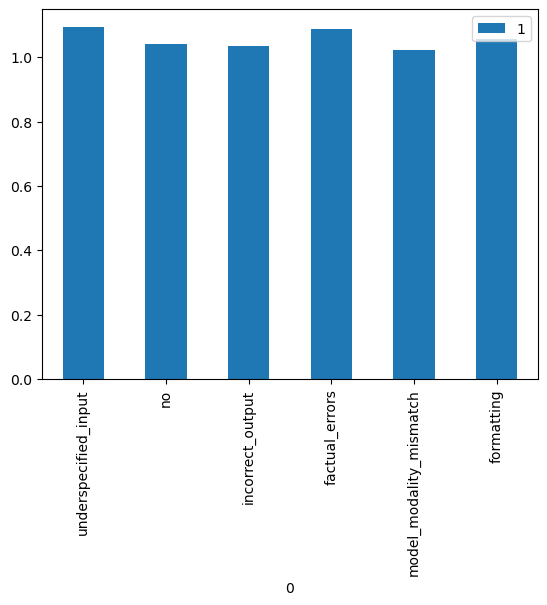

anasedova/tulu_3_factual_errors


,0,1
4,model_modality_mismatch,1.023232
2,incorrect_output,1.035020
1,no,1.039917
5,formatting,1.057554
3,factual_errors,1.085925
0,underspecified_input,1.093720


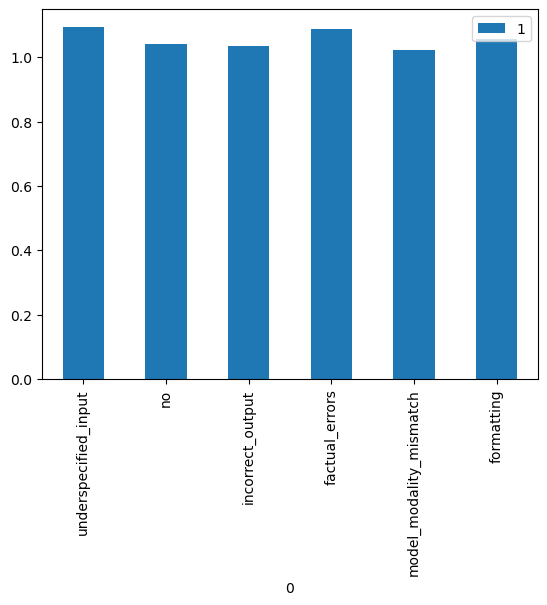

anasedova/tulu_3_formatting_errors


,0,1
4,model_modality_mismatch,1.023232
2,incorrect_output,1.035020
1,no,1.039917
5,formatting,1.057554
3,factual_errors,1.085925
0,underspecified_input,1.093720


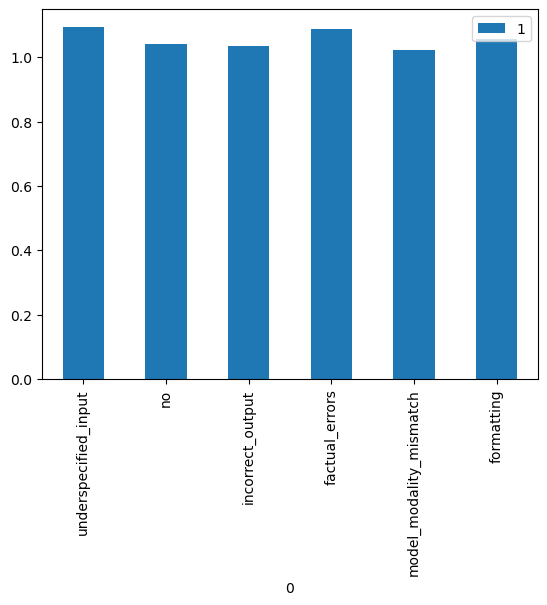

anasedova/tulu_3_incorrect_output_errors


,0,1
4,model_modality_mismatch,1.023232
2,incorrect_output,1.035020
1,no,1.039917
5,formatting,1.057554
3,factual_errors,1.085925
0,underspecified_input,1.093720


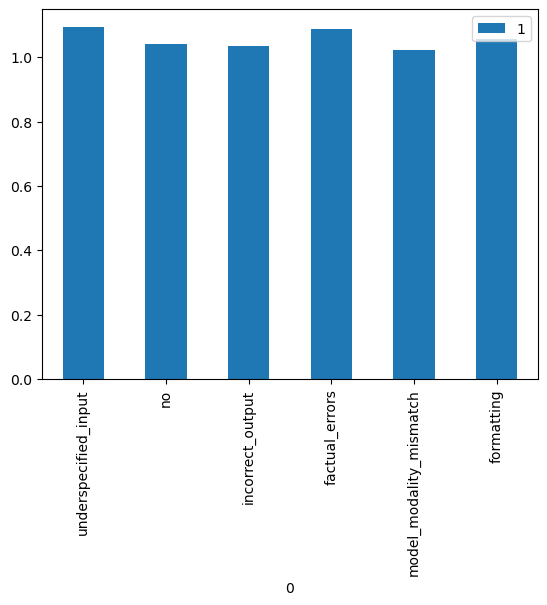

anasedova/tulu_3_model_modality_mismatch_errors


,0,1
4,model_modality_mismatch,1.023232
2,incorrect_output,1.035020
1,no,1.039917
5,formatting,1.057554
3,factual_errors,1.085925
0,underspecified_input,1.093720


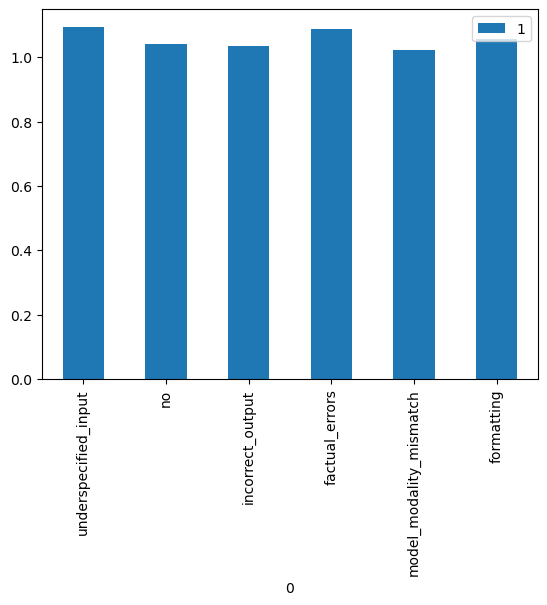

anasedova/tulu_3_no_errors


,0,1
4,model_modality_mismatch,1.023232
2,incorrect_output,1.035020
1,no,1.039917
5,formatting,1.057554
3,factual_errors,1.085925
0,underspecified_input,1.093720


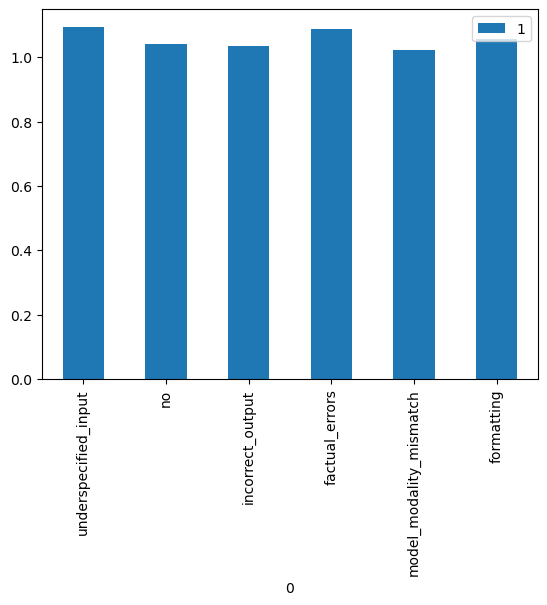

anasedova/tulu_3_underspecified_input_errors


,0,1
4,model_modality_mismatch,1.023232
2,incorrect_output,1.035020
1,no,1.039917
5,formatting,1.057554
3,factual_errors,1.085925
0,underspecified_input,1.093720


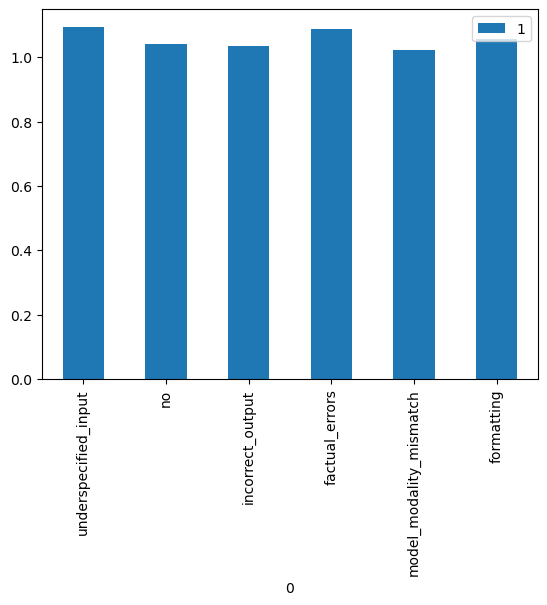

In [33]:
for name, df_ in df.groupby("test_dataset"):
    print(name)
    a = []
    for noise_type in df_["noise_type"].unique():
        d = df_[df_["prompt"].isin(df_[df_["noise_type"] == noise_type]["prompt"])]
        a.append((noise_type, d.groupby(["prompt"])["noise_type"].nunique().mean()))

    display(pd.DataFrame(a).sort_values(by=1))
    pd.DataFrame(a).set_index(0).plot.bar()
    plt.show()


prompt                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
len(df_tulu_test_only["prompt"]) / len(df_tulu_test_only["prompt"].unique())

1.8952716267339218

<Axes: xlabel='noise_type'>

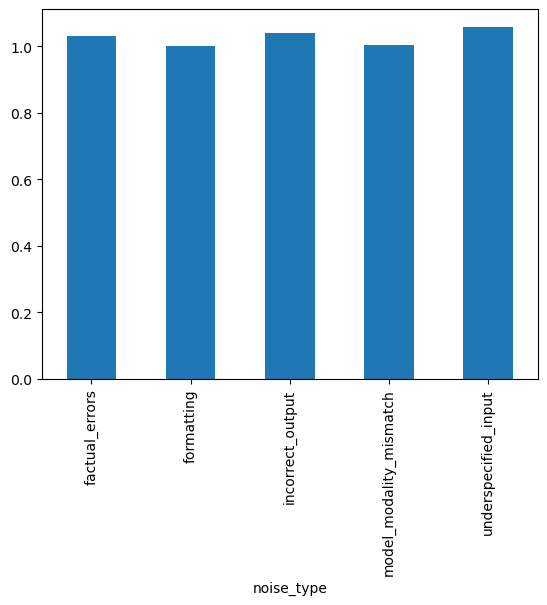

In [ ]:
df_tulu_test_only.groupby(['noise_type'])["prompt"].value_counts().groupby("noise_type").mean().plot.bar()

In [ ]:
df_tulu_test_only

,id,messages,source,dataset,tulu_id,prompt,completion,noise_type,old_ordinal_id,test_dataset,influence
6575408,oasst1_5921,[{'content': 'Create a snippet of Terraform HC...,ai2-adapt-dev/oasst1_converted,None,oasst1_5921,Create a snippet of Terraform HCL code that cr...,"Sure, here's an example Terraform HCL code tha...",underspecified_input,0.0,anasedova/tulu-3-sft-mixture,0.009094
6575409,oasst1_1096,[{'content': '¿Por qué crees que cada año es m...,ai2-adapt-dev/oasst1_converted,None,NaN,NaN,NaN,no,NaN,anasedova/tulu-3-sft-mixture,0.016113
6575410,oasst1_1752,[{'content': 'Nenn mir einen lustigen Witz übe...,ai2-adapt-dev/oasst1_converted,None,oasst1_1752,Nenn mir einen lustigen Witz über Polen.,Was ist die am wenigsten besuchte Einrichtung ...,incorrect_output,2.0,anasedova/tulu-3-sft-mixture,0.124512
6575411,oasst1_2492,[{'content': 'Cuál es equivalente a una bombil...,ai2-adapt-dev/oasst1_converted,None,NaN,NaN,NaN,no,NaN,anasedova/tulu-3-sft-mixture,0.023804
6575412,oasst1_4628,[{'content': 'Com es fa una truita de patates?...,ai2-adapt-dev/oasst1_converted,None,NaN,NaN,NaN,no,NaN,anasedova/tulu-3-sft-mixture,0.019043
...,...,...,...,...,...,...,...,...,...,...,...
7514747,hard_coded_19,[{'content': 'Draw me an ASCII art logo for yo...,None,hard_coded,hard_coded_19,Draw me an ASCII art logo for yourself.,____o__ __o____ o ...,incorrect_output,938373.0,anasedova/tulu-3-sft-mixture,0.036133
7514748,hard_coded_20,"[{'content': 'Draw me an ASCII art for Ai2.', ...",None,hard_coded,hard_coded_20,Draw me an ASCII art for Ai2.,$$$$$$\ $$\ $$$$$$\ \n$$ __$$\ \__|$$ __...,incorrect_output,938489.0,anasedova/tulu-3-sft-mixture,0.046631
7514749,hard_coded_21,"[{'content': 'What is your favorite drink?', '...",None,hard_coded,hard_coded_21,What is your favorite drink?,I'm just a language model and don't have drink...,incorrect_output,938536.0,anasedova/tulu-3-sft-mixture,0.134766
7514750,hard_coded_22,"[{'content': 'Hi, how are you?', 'role': 'user...",None,hard_coded,NaN,NaN,NaN,no,NaN,anasedova/tulu-3-sft-mixture,0.231445


In [ ]:
pd.DataFrame

                noise_type  average_count_per_prompt
0           factual_errors                  8.261492
1               formatting                  8.000000
2         incorrect_output                  8.313284
3  model_modality_mismatch                  8.040404
4                       no                  8.776565
5     underspecified_input                  8.471350


In [ ]:
count_per_prompt.sort_values(by="prompt").groupby("noise_type").mean()

KeyboardInterrupt: 

In [ ]:
6zhtjnbfgd

SyntaxError: invalid decimal literal (3720592426.py, line 1)

In [ ]:
(df_tulu_test_only.groupby("noise_type")["prompt"].value_counts() / df_tulu_test_only["prompt"].value_counts()).groupby("noise_type").describe()

,count,mean,std,min,25%,50%,75%,max
noise_type,,,,,,,,
factual_errors,18295.0,0.957344,0.147421,0.015873,1.0,1.0,1.0,1.0
formatting,139.0,0.968225,0.130955,0.250000,1.0,1.0,1.0,1.0
incorrect_output,447721.0,0.982482,0.095530,0.005291,1.0,1.0,1.0,1.0
model_modality_mismatch,990.0,0.988557,0.080854,0.028571,1.0,1.0,1.0,1.0
no,384071.0,0.981038,0.096928,0.009174,1.0,1.0,1.0,1.0
underspecified_input,30890.0,0.955547,0.153468,0.002809,1.0,1.0,1.0,1.0


In [ ]:
df_tulu_test_only.groupby(["noise_type", "prompt"])

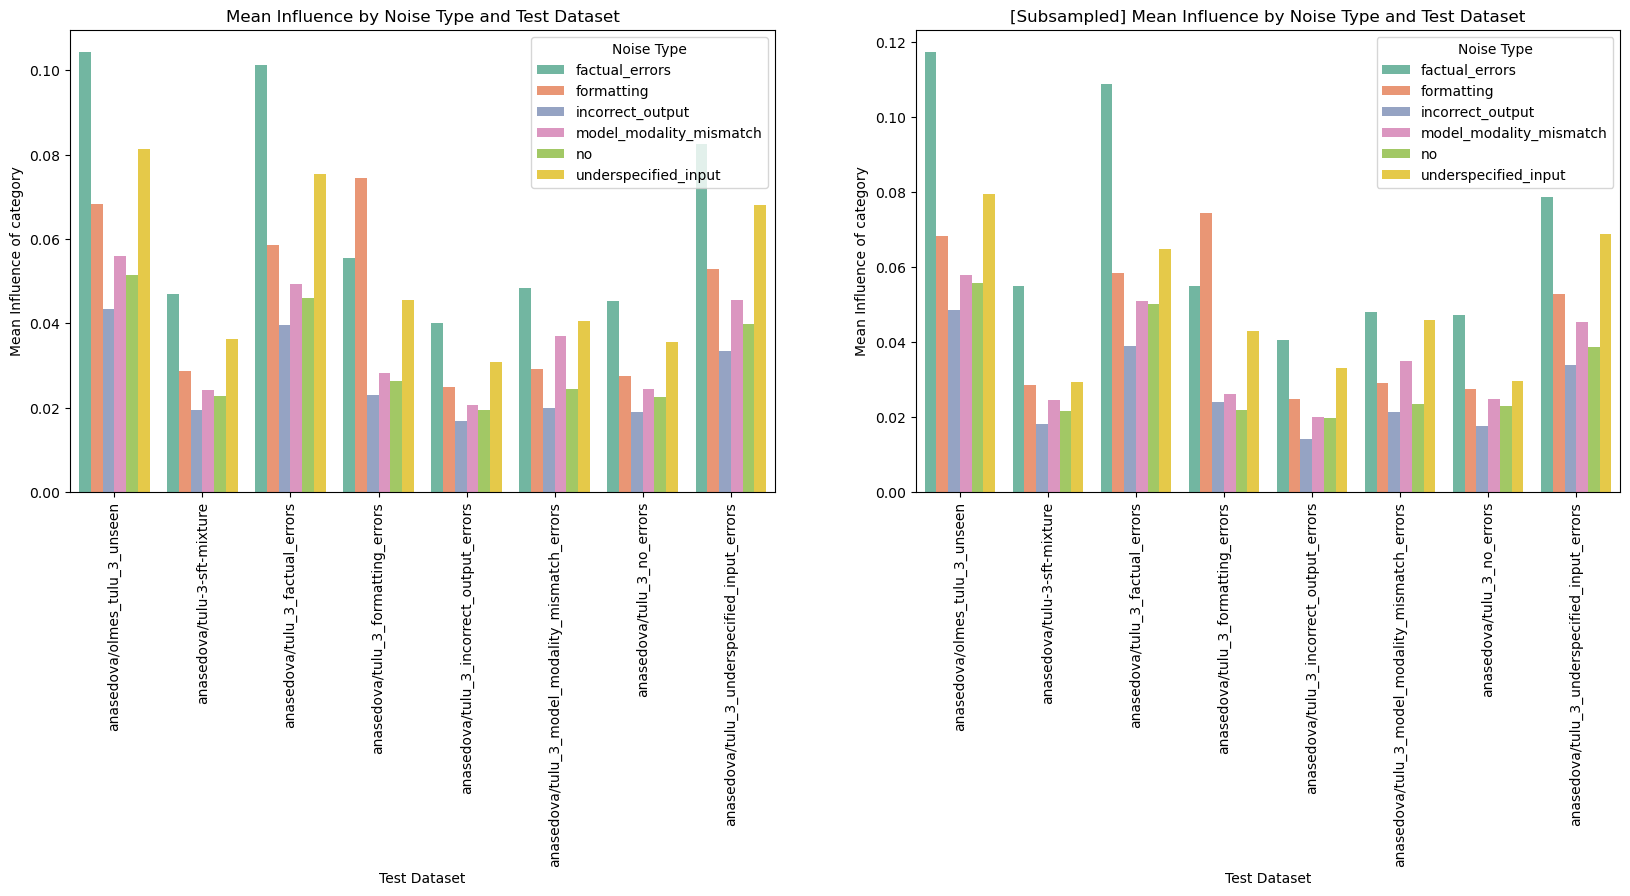

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(20, 6))


grouped = df.groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()
sns.barplot(data=grouped, x='test_dataset', y='influence', hue='noise_type', palette="Set2", ax=axes[0])
axes[0].set_title("Mean Influence by Noise Type and Test Dataset")
axes[0].set_xlabel("Test Dataset")
axes[0].set_ylabel("Mean Influence of category")
axes[0].legend(title='Noise Type')
axes[0].tick_params(axis='x', labelrotation=90)


t = df.groupby("noise_type").sample(df.groupby("noise_type").size().min())
grouped = t.groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()
sns.barplot(data=grouped, x='test_dataset', y='influence', hue='noise_type', palette="Set2", ax=axes[1])
axes[1].set_title("[Subsampled] Mean Influence by Noise Type and Test Dataset")
axes[1].set_xlabel("Test Dataset")
axes[1].set_ylabel("Mean Influence of category")
axes[1].legend(title='Noise Type')
axes[1].tick_params(axis='x', labelrotation=90)

# Adjust layout to prevent overlap


# Show the plots
plt.show()


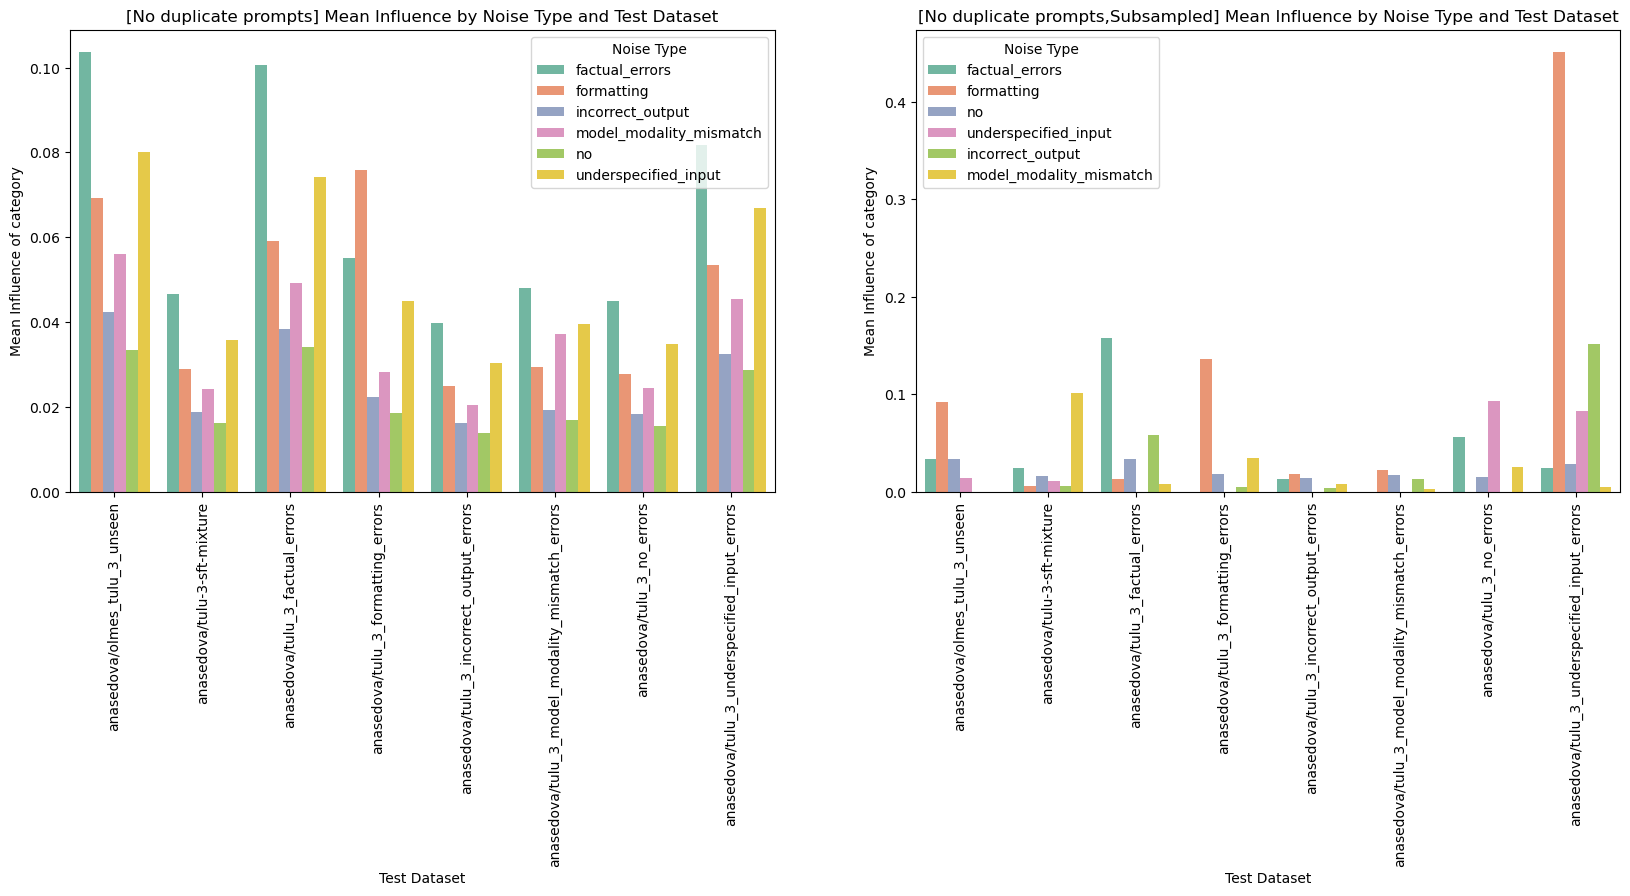

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(20, 6))


grouped = df.drop_duplicates(["prompt","test_dataset"]).groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()
sns.barplot(data=grouped, x='test_dataset', y='influence', hue='noise_type', palette="Set2", ax=axes[0])
axes[0].set_title("[No duplicate prompts] Mean Influence by Noise Type and Test Dataset")
axes[0].set_xlabel("Test Dataset")
axes[0].set_ylabel("Mean Influence of category")
axes[0].legend(title='Noise Type')
axes[0].tick_params(axis='x', labelrotation=90)


t = df.drop_duplicates(["prompt","test_dataset"]).groupby("noise_type").sample(df.drop_duplicates(["prompt","test_dataset"]).groupby("noise_type").size().min())
grouped = t.groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()
sns.barplot(data=grouped, x='test_dataset', y='influence', hue='noise_type', palette="Set2", ax=axes[1])
axes[1].set_title("[No duplicate prompts,Subsampled] Mean Influence by Noise Type and Test Dataset")
axes[1].set_xlabel("Test Dataset")
axes[1].set_ylabel("Mean Influence of category")
axes[1].legend(title='Noise Type')
axes[1].tick_params(axis='x', labelrotation=90)

# Adjust layout to prevent overlap


# Show the plots
plt.show()


In [ ]:
len(df_["prompt"]) / len(df["prompt"].unique())

15.162173013871374

In [ ]:
len(df.groupby("noise_type").sample(df.groupby("noise_type").size().min()))

6672

,id,messages,source,dataset,tulu_id,prompt,completion,noise_type,old_ordinal_id,test_dataset,influence,prompt_lenght
0,oasst1_5921,"[{'content': 'Create a snippet of Terraform HCL code that create an AWS autoscaling group, and an ALB in front to expose an application to internet.', 'role': 'user'}, {'content': 'Sure, here's an example Terraform HCL code that creates an AWS Autoscaling Group and an Application Load Balancer to expose an application to the internet: ``` # Configure the AWS provider provider ""aws"" { region...",ai2-adapt-dev/oasst1_converted,None,oasst1_5921,"Create a snippet of Terraform HCL code that create an AWS autoscaling group, and an ALB in front to expose an application to internet.","Sure, here's an example Terraform HCL code that creates an AWS Autoscaling Group and an Application Load Balancer to expose an application to the internet:\n``` \n# Configure the AWS provider\nprovider ""aws"" {\n region = ""us-east-1""\n}\n\n# Create a security group to allow traffic to the ALB\nresource ""aws_security_group"" ""alb_sg"" {\n name_prefix = ""alb_sg""\n ingress {\n from_port = 80\n...",underspecified_input,0.0,anasedova/tulu_3_factual_errors,0.018311,24.0
1,oasst1_1096,"[{'content': '¿Por qué crees que cada año es más difícil tener una casa propia en comparación a décadas anteriores?', 'role': 'user'}, {'content': 'Existen varios factores que pueden contribuir a que cada año sea más difícil tener una casa propia en comparación con décadas anteriores. Algunos de los factores más importantes son: - El aumento del precio de la vivienda: En muchas ciudades del mu...",ai2-adapt-dev/oasst1_converted,None,NaN,NaN,NaN,no,NaN,anasedova/tulu_3_factual_errors,0.034180,91.0
2,oasst1_1752,"[{'content': 'Nenn mir einen lustigen Witz über Polen.', 'role': 'user'}, {'content': 'Was ist die am wenigsten besuchte Einrichtung in Polen? Das Fundbüro.', 'role': 'assistant'}]",ai2-adapt-dev/oasst1_converted,None,oasst1_1752,Nenn mir einen lustigen Witz über Polen.,Was ist die am wenigsten besuchte Einrichtung in Polen?\n\nDas Fundbüro.,incorrect_output,2.0,anasedova/tulu_3_factual_errors,0.259766,7.0
5,oasst1_4127,"[{'content': 'Cinco capitales de países que empiecen por K', 'role': 'user'}, {'content': 'Aquí tienes cinco capitales de países que empiezan con la letra ""K"": 1-Kigali, Ruanda 2-Kiev, Ucrania 3-Kingston, Jamaica 4-Kuwait City, Kuwait 5-Kabul, Afganistán', 'role': 'assistant'}]",ai2-adapt-dev/oasst1_converted,None,oasst1_4127,Cinco capitales de países que empiecen por K,"Aquí tienes cinco capitales de países que empiezan con la letra ""K"":\n\n1-Kigali, Ruanda\n2-Kiev, Ucrania\n3-Kingston, Jamaica\n4-Kuwait City, Kuwait\n5-Kabul, Afganistán",incorrect_output,5.0,anasedova/tulu_3_factual_errors,0.128906,8.0
7,oasst1_6476,"[{'content': 'Can u summarize me story from the book Harry Potter and the Philosopher's Stone?', 'role': 'user'}, {'content': 'Harry Potter, an orphan, discovers he is a wizard and attends Hogwarts School of Witchcraft and Wizardry. He learns of a powerful stone that can grant immortality and ultimate power, guarded by the evil wizard Voldemort. With the help of friends, Harry must overcome ch...",ai2-adapt-dev/oasst1_converted,None,oasst1_6476,Can u summarize me story from the book Harry Potter and the Philosopher's Stone?,"Harry Potter, an orphan, discovers he is a wizard and attends Hogwarts School of Witchcraft and Wizardry. He learns of a powerful stone that can grant immortality and ultimate power, guarded by the evil wizard Voldemort. With the help of friends, Harry must overcome challenges and defeat Voldemort to prevent him from obtaining the stone.",underspecified_input,7.0,anasedova/tulu_3_factual_errors,0.034424,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
939336,hard_coded_16,"[{'content': ' ', 'role': 'user'}, {'content': 'I don't think you entered a message. Let me know what I can help with!', 'role': 'assistant'}]",None,hard_coded,hard_coded_16,\n,I don't think you entere

AttributeError: 'SeriesGroupBy' object has no attribute 'absolute'

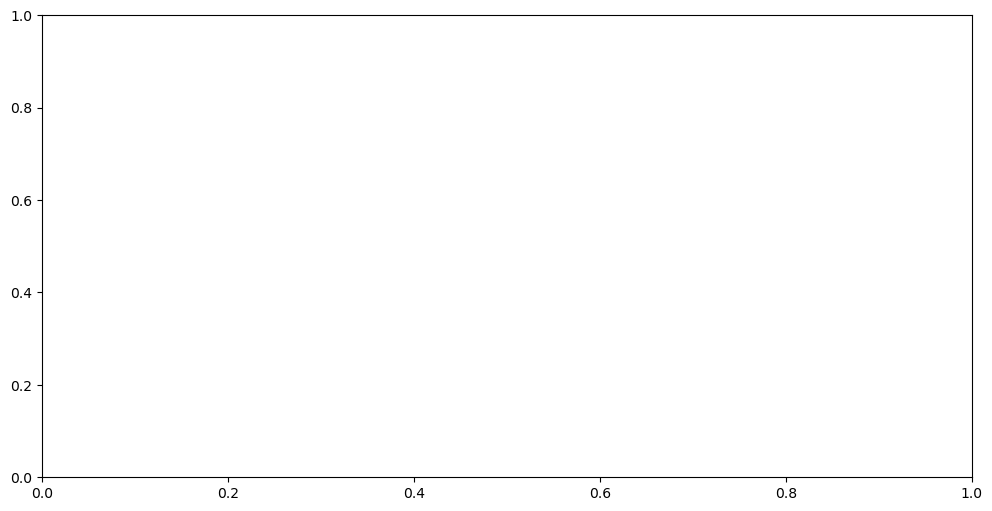

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 6))


grouped_full = df.groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()


baseline = grouped_full[grouped_full["noise_type"] == "no"]


grouped_full = grouped_full.merge(baseline[["test_dataset", "influence"]], on="test_dataset", suffixes=("", "_baseline"))
grouped_full["adjusted_influence"] = grouped_full["influence"] - grouped_full["influence_baseline"]
grouped_full = grouped_full.drop(columns=["influence_baseline", "influence"])


sns.barplot(data=grouped_full, x='test_dataset', y='adjusted_influence', hue='noise_type', 
            palette="Set2", alpha=0.6, ax=ax, dodge=True)


t = df.groupby("noise_type").sample(df.groupby("noise_type").size().min())
grouped_subsampled = t.groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()


baseline_subsampled = grouped_subsampled[grouped_subsampled["noise_type"] == "no"]
grouped_subsampled = grouped_subsampled.merge(baseline_subsampled[["test_dataset", "influence"]], on="test_dataset", suffixes=("", "_baseline"))

grouped_subsampled["adjusted_influence"] = grouped_subsampled["influence"] - grouped_subsampled["influence_baseline"]


grouped_subsampled = grouped_subsampled.drop(columns=["influence_baseline", "influence"])


sns.barplot(data=grouped_subsampled, x='test_dataset', y='adjusted_influence', hue='noise_type', 
            palette="Set2", ax=ax, gap=0.5, dodge=True, edgecolor="black", alpha=0.6)


ax.axhline(y=0, color='black', linestyle='--', label='Baseline (mean of "not noise")')


ax.set_title("Difference in Means irt to class of not noisy examples [subsampled with borders]")
ax.set_xlabel("Test Dataset")
ax.set_ylabel("Adjusted Mean Influence of Category (Relative to 'no')")
ax.legend(title='Noise Type', ncol=2)


ax.tick_params(axis='x', labelrotation=45)


plt.show()


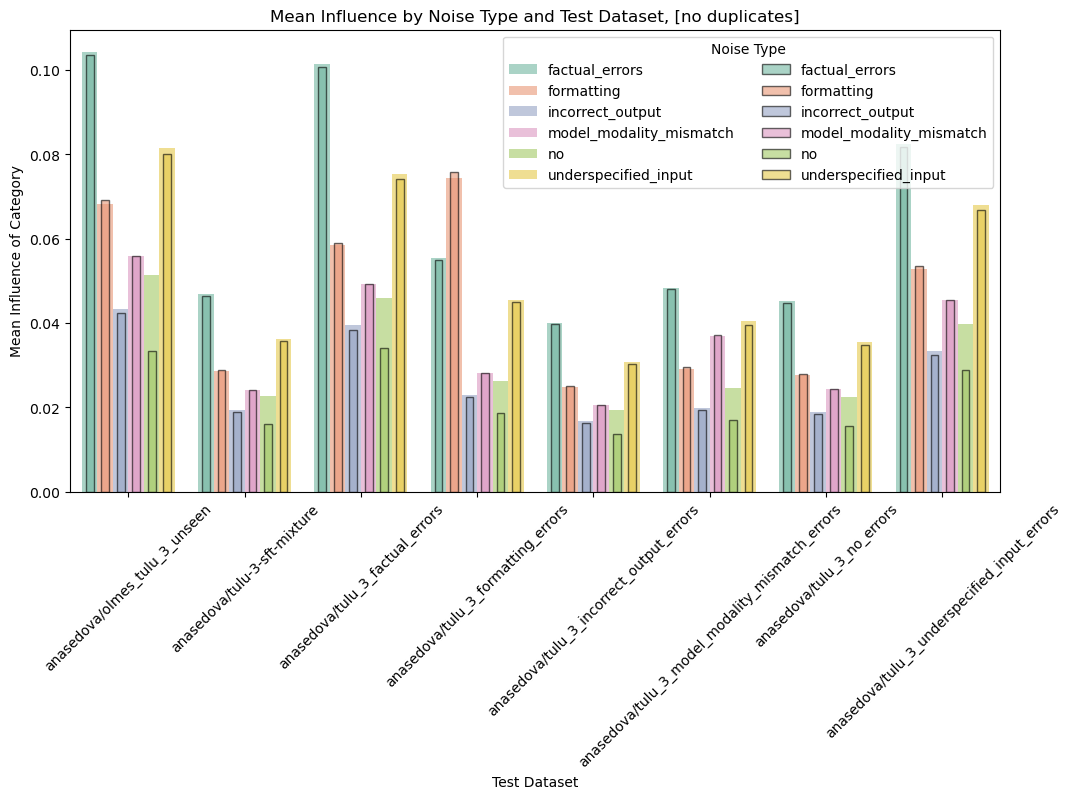

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 6))


grouped_full = df.groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()
sns.barplot(data=grouped_full, x='test_dataset', y='influence', hue='noise_type', 
            palette="Set2", alpha=0.6, ax=ax, dodge=True)



grouped_subsampled =  df.drop_duplicates(["prompt","test_dataset"]).groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()
sns.barplot(data=grouped_subsampled, x='test_dataset', y='influence', hue='noise_type', 
            palette="Set2", ax=ax,  gap=0.5,dodge=True, edgecolor="black", alpha=0.6)

# Labels and Title
ax.set_title("Mean Influence by Noise Type and Test Dataset, [no duplicates]")
ax.set_xlabel("Test Dataset")
ax.set_ylabel("Mean Influence of Category")
ax.legend(title='Noise Type',ncol=2)


ax.tick_params(axis='x', labelrotation=45)

# Show the plot
plt.show()


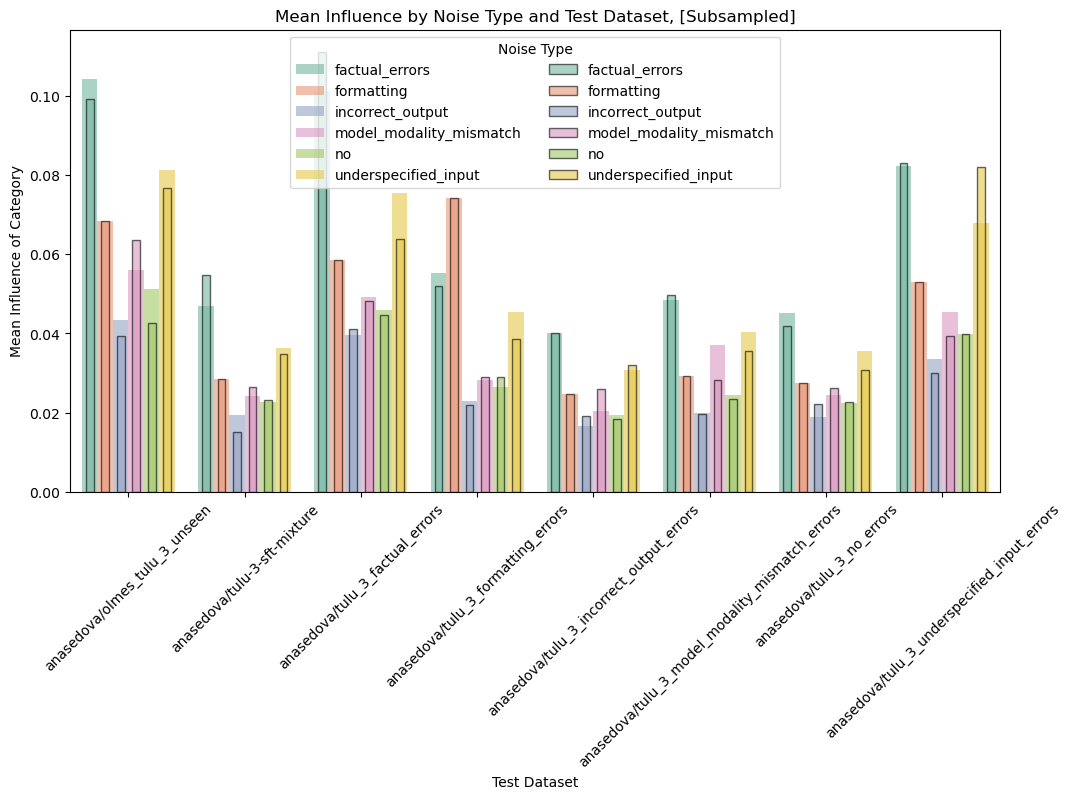

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 6))


grouped_full = df.groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()
sns.barplot(data=grouped_full, x='test_dataset', y='influence', hue='noise_type', 
            palette="Set2", alpha=0.6, ax=ax, dodge=True)


t = df.groupby("noise_type").sample(df.groupby("noise_type").size().min())
grouped_subsampled = t.groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()
sns.barplot(data=grouped_subsampled, x='test_dataset', y='influence', hue='noise_type', 
            palette="Set2", ax=ax,  gap=0.5,dodge=True, edgecolor="black", alpha=0.6)

# Labels and Title
ax.set_title("Mean Influence by Noise Type and Test Dataset, [Subsampled]")
ax.set_xlabel("Test Dataset")
ax.set_ylabel("Mean Influence of Category")
ax.legend(title='Noise Type',ncol=2)


ax.tick_params(axis='x', labelrotation=45)

# Show the plot
plt.show()


incorrect_output -plausible-> shouldn't be influential, because high loss during training, so trigger small update
inc

In [ ]:
pd.set_option('max_colwidth', 400)

In [ ]:
df[df["noise_type"] == "underspecified_input"]

,id,messages,source,dataset,tulu_id,prompt,completion,noise_type,old_ordinal_id,test_dataset,influence,prompt_lenght
0,oasst1_5921,"[{'content': 'Create a snippet of Terraform HCL code that create an AWS autoscaling group, and an ALB in front to expose an application to internet.', 'role': 'user'}, {'content': 'Sure, here's an example Terraform HCL code that creates an AWS Autoscaling Group and an Application Load Balancer to expose an application to the internet: ``` # Configure the AWS provider provider ""aws"" { region...",ai2-adapt-dev/oasst1_converted,None,oasst1_5921,"Create a snippet of Terraform HCL code that create an AWS autoscaling group, and an ALB in front to expose an application to internet.","Sure, here's an example Terraform HCL code that creates an AWS Autoscaling Group and an Application Load Balancer to expose an application to the internet:\n``` \n# Configure the AWS provider\nprovider ""aws"" {\n region = ""us-east-1""\n}\n\n# Create a security group to allow traffic to the ALB\nresource ""aws_security_group"" ""alb_sg"" {\n name_prefix = ""alb_sg""\n ingress {\n from_port = 80\n...",underspecified_input,0.0,anasedova/tulu_3_factual_errors,0.018311,24.0
7,oasst1_6476,"[{'content': 'Can u summarize me story from the book Harry Potter and the Philosopher's Stone?', 'role': 'user'}, {'content': 'Harry Potter, an orphan, discovers he is a wizard and attends Hogwarts School of Witchcraft and Wizardry. He learns of a powerful stone that can grant immortality and ultimate power, guarded by the evil wizard Voldemort. With the help of friends, Harry must overcome ch...",ai2-adapt-dev/oasst1_converted,None,oasst1_6476,Can u summarize me story from the book Harry Potter and the Philosopher's Stone?,"Harry Potter, an orphan, discovers he is a wizard and attends Hogwarts School of Witchcraft and Wizardry. He learns of a powerful stone that can grant immortality and ultimate power, guarded by the evil wizard Voldemort. With the help of friends, Harry must overcome challenges and defeat Voldemort to prevent him from obtaining the stone.",underspecified_input,7.0,anasedova/tulu_3_factual_errors,0.034424,14.0
11,oasst1_1247,"[{'content': 'Com creus que podem abordar el canvi climàtic?', 'role': 'user'}, {'content': 'Per revertir els efectes del canvi climàtic, principalment s'han de reduir dràsticament les emissions de CO2, ampliant les fonts d'energia renovables i reduint el consum d'hidrocarburs.', 'role': 'assistant'}]",ai2-adapt-dev/oasst1_converted,None,oasst1_1247,Com creus que podem abordar el canvi climàtic?,"Per revertir els efectes del canvi climàtic, principalment s'han de reduir dràsticament les emissions de CO2, ampliant les fonts d'energia renovables i reduint el consum d'hidrocarburs.",underspecified_input,11.0,anasedova/tulu_3_factual_errors,0.135742,8.0
42,oasst1_6663,"[{'content': 'Bonjour. J'ai besoin d'aide pour une question de physique, peux-tu m'aider ?', 'role': 'user'}, {'content': 'Bien sûr ! Je suis là pour vous aider. Posez votre question et je ferai de mon mieux pour y répondre.', 'role': 'assistant'}, {'content': 'Qu'est-ce que la tension superficielle de l'eau ?', 'role': 'user'}, {'content': 'La tension superficielle de l'eau est la force qui m...",ai2-adapt-dev/oasst1_converted,None,oasst1_6663,"Bonjour. J'ai besoin d'aide pour une question de physique, peux-tu m'aider ?",Bien sûr ! Je suis là pour vous aider. Posez votre question et je ferai de mon mieux pour y répondre.,underspecified_input,42.0,anasedova/tulu_3_factual_errors,0.065430,12.0
70,oasst1_4184,"[{'content': 'Hola, cuan seria la metodología para minimizar el deterioro de la humanidad?. Que países contribuyen mas a este deterioro?. Cuales son las políticas que agreden mas a los menos capacitados.', 'role': 'user'}, {'content': 'Hola! La minimización del deterioro de la humanidad es un desafío complejo que requiere un enfoque multidisciplinario e integrado. Aquí hay algunas sugerencias ...",ai2-adapt-dev/oasst1_converted,None,oas

In [ ]:
t = df.groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()

Text(0.5, 1.0, 'Mean influence per noise_type (test noise_type = train noise_type)')

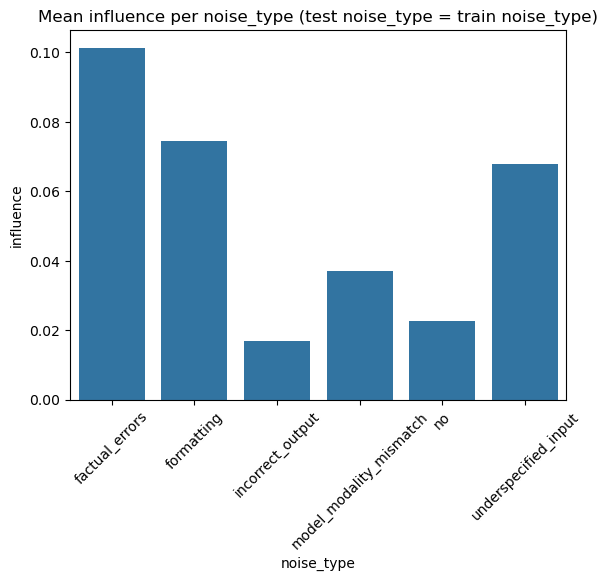

In [ ]:
a = t[t.apply(lambda row: row["noise_type"] in row["test_dataset"],axis=1)]
sns.barplot(a, x="noise_type",y="influence")
plt.tick_params(axis='x', labelrotation=45)
plt.title("Mean influence per noise_type (test noise_type = train noise_type)")

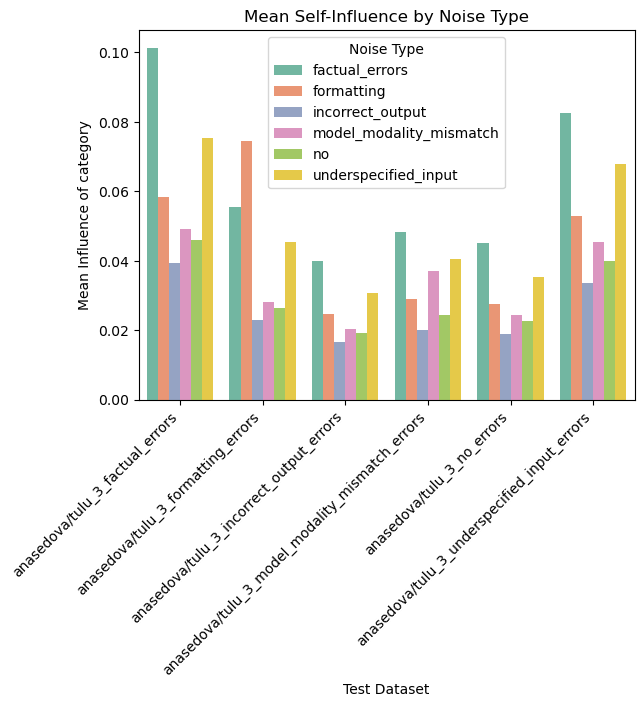

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

t = df.groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()
t = t[t["test_dataset"].str.contains('|'.join(t["noise_type"].dropna()), na=False)]

grouped = t.groupby(["test_dataset", "noise_type"])["influence"].mean().reset_index()


sns.barplot(data=grouped, x='test_dataset', y='influence', hue='noise_type', palette="Set2")

plt.title("Mean Self-Influence by Noise Type")
plt.xlabel("Test Dataset")
plt.ylabel("Mean Influence of category")
plt.legend(title='Noise Type')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
df.groupby("noise_type")[["prompt_lenght"]].describe()

prompt_lenght                                     \
                                count        mean         std  min   25%   
noise_type                                                                 
factual_errors               151144.0   66.419150  571.300989  1.0   8.0   
formatting                     1112.0   90.115108  192.543600  1.0  10.0   
incorrect_output            3721984.0  196.974265  858.771377  0.0  31.0   
model_modality_mismatch        7960.0   74.712563  111.503151  1.0  10.0   
no                                0.0         NaN         NaN  NaN   NaN   
underspecified_input         261656.0   70.383129  643.207875  0.0   7.0   

                                                
                           50%    75%      max  
noise_type                                      
factual_errors            14.0   39.0  39329.0  
formatting                43.0   87.0   1367.0  
incorrect_output         111.0  205.0  72312.0  
model_modality_mismatch   23.0   98.0   1146.0  
no                         NaN    NaN      NaN  
underspecified_input      13.0   38.0  40763.0

In [ ]:
df[df["test_dataset"] == "anasedova/tulu-3-sft-mixture"].sort_values(by="influence")

,id,messages,source,dataset,tulu_id,prompt,completion,noise_type,old_ordinal_id,test_dataset,influence,prompt_lenght
7502712,ai2-adapt-dev/tulu_v3.9_aya_100k_88200,[{'content': 'Mutsara 1: Vamwe vaimbi vakakuru...,ai2-adapt-dev/tulu_v3.9_aya_100k,None,ai2-adapt-dev/tulu_v3.9_aya_100k_88200,Mutsara 1: Vamwe vaimbi vakakurumbira vanorati...,Hongu,incorrect_output,926509.0,anasedova/tulu-3-sft-mixture,-0.196289,52.0
7511880,ai2-adapt-dev/tulu_v3.9_aya_100k_97368,[{'content': 'Sheeg Nebigii Uu Soo Koriyey Nin...,ai2-adapt-dev/tulu_v3.9_aya_100k,None,ai2-adapt-dev/tulu_v3.9_aya_100k_97368,Sheeg Nebigii Uu Soo Koriyey Ninkii Ilaahnimad...,"Waa Nebi Muuse Cs, Oo Waxaa Soo Koriyey Cirfoo...",incorrect_output,935677.0,anasedova/tulu-3-sft-mixture,-0.069336,10.0
7285597,personahub_kj08gkdvfbfqabazjx6ou09n,[{'content': 'Explain how public perception of...,ai2-adapt-dev/personahub_ifdata_manual_seed_v3...,None,personahub_kj08gkdvfbfqabazjx6ou09n,Explain how public perception of controversial...,Public perception of controversial political f...,incorrect_output,709394.0,anasedova/tulu-3-sft-mixture,-0.067383,60.0
7283054,personahub_ne7zfmqvje9xq7npe5nws1st,[{'content': 'Provide a detailed explanation o...,ai2-adapt-dev/personahub_ifdata_manual_seed_v3...,None,NaN,NaN,NaN,no,NaN,anasedova/tulu-3-sft-mixture,-0.054443,NaN
6611154,ai2-adapt-dev/flan_v2_converted_28614,[{'content': 'Detailed Instructions: In this t...,ai2-adapt-dev/flan_v2_converted,None,ai2-adapt-dev/flan_v2_converted_28614,"Detailed Instructions: In this task, you are g...",personal,incorrect_output,35746.0,anasedova/tulu-3-sft-mixture,-0.052246,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7367969,ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,"[{'content': 'no', 'role': 'user'}, {'content'...",ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,None,ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,no,None,underspecified_input,791766.0,anasedova/tulu-3-sft-mixture,0.402344,1.0
7373295,ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,"[{'content': 'What?', 'role': 'user'}, {'conte...",ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,None,ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,What?,None,underspecified_input,797092.0,anasedova/tulu-3-sft-mixture,0.402344,1.0
7385434,ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,"[{'content': 'Any others?', 'role': 'user'}, {...",ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,None,ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,Any others?,None,underspecified_input,809231.0,anasedova/tulu-3-sft-mixture,0.406250,2.0
7351741,ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,"[{'content': 'Any other tips?', 'role': 'user'...",ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,None,ai2-adapt-dev/tulu_v3.9_synthetic_finalresp_wi...,Any other tips?,None,underspecified_input,775538.0,anasedova/tulu-3-sft-mixture,0.437500,3.0


(0.0, 5000.0)

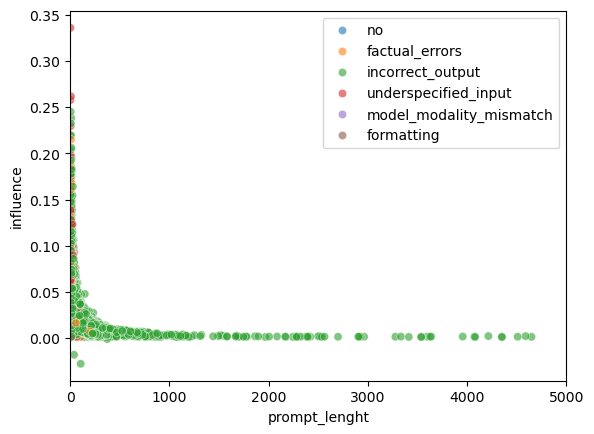

In [ ]:
df_tulu_test_only = df[df["test_dataset"]== "anasedova/tulu-3-sft-mixture"]
sns.scatterplot(data=df_tulu_test_only.sample(frac=0.01,random_state=42), x="prompt_lenght", y="influence", hue="noise_type",alpha=0.6, )
plt.legend(loc='upper right')
plt.xlim(0,5000)

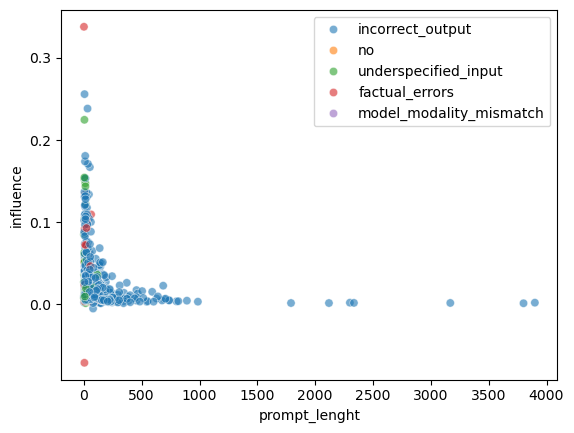

In [ ]:
sns.scatterplot(data=df.sample(df.groupby("noise_type").size().min(),random_state=42), x="prompt_lenght", y="influence", hue="noise_type",alpha=0.6, )
plt.legend(loc='upper right')


In [ ]:
spearman_corr

test_dataset,anasedova/olmes_tulu_3_unseen,anasedova/tulu-3-sft-mixture,anasedova/tulu_3_factual_errors,anasedova/tulu_3_formatting_errors,anasedova/tulu_3_incorrect_output_errors,anasedova/tulu_3_model_modality_mismatch_errors,anasedova/tulu_3_no_errors,anasedova/tulu_3_underspecified_input_errors
test_dataset,,,,,,,,
anasedova/olmes_tulu_3_unseen,1.000000,1.000000,1.000000,0.828571,1.000000,0.942857,1.000000,1.000000
anasedova/tulu-3-sft-mixture,1.000000,1.000000,1.000000,0.828571,1.000000,0.942857,1.000000,1.000000
anasedova/tulu_3_factual_errors,1.000000,1.000000,1.000000,0.828571,1.000000,0.942857,1.000000,1.000000
anasedova/tulu_3_formatting_errors,0.828571,0.828571,0.828571,1.000000,0.828571,0.657143,0.828571,0.828571
anasedova/tulu_3_incorrect_output_errors,1.000000,1.000000,1.000000,0.828571,1.000000,0.942857,1.000000,1.000000
anasedova/tulu_3_model_modality_mismatch_errors,0.942857,0.942857,0.942857,0.657143,0.942857,1.000000,0.942857,0.942857
anasedova/tulu_3_no_errors,1.000000,1.000000,1.000000,0.828571,1.000000,0.942857,1.000000,1.000000
anasedova/tulu_3_underspecified_input_errors,1.000000,1.000000,1.000000,0.828571,1.000000,0.942857,1.000000,1.000000


Text(0.5, 1.0, 'Spearman rank correlation of mean scores per noise type (is the ranking of noise types per category consistent across datasets?)')

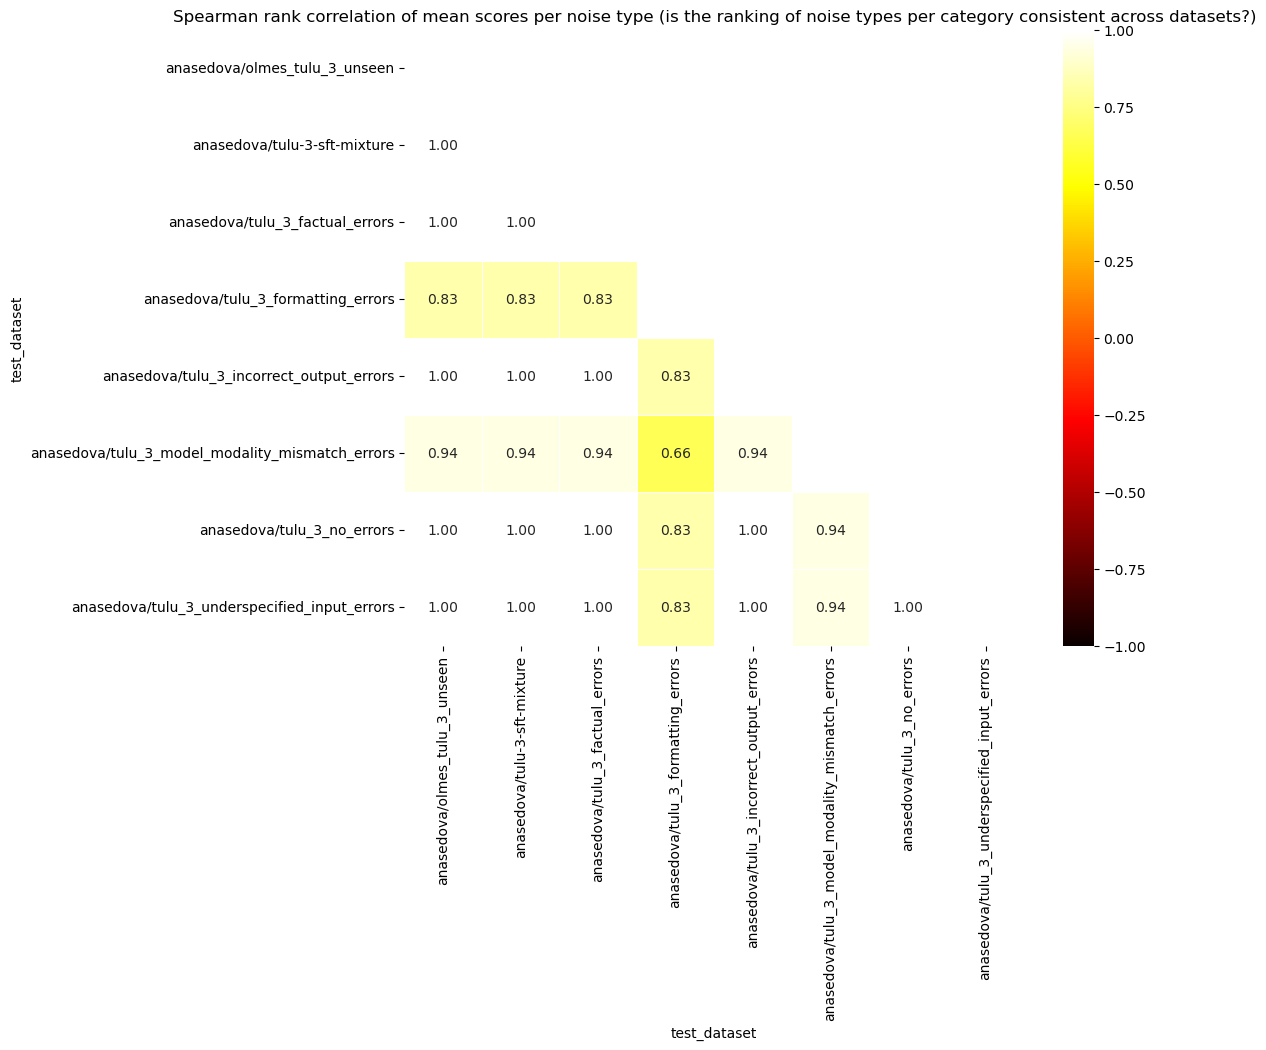

In [ ]:
spearman_corr = df.groupby(["test_dataset","noise_type"])["influence"].mean().reset_index().pivot(index="noise_type", columns="test_dataset", values="influence").corr(method="spearman")

plt.figure(figsize=(10, 8)) 
sns.heatmap(spearman_corr, annot=True, cmap="hot", fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, mask=np.triu(np.ones_like(spearman_corr, dtype=bool)))
plt.title("Spearman rank correlation of mean scores per noise type (is the ranking of noise types per category consistent across datasets?)")

In [ ]:
df

Text(0.5, 1.0, '[Subsampled] Spearman rank correlation of mean scores per noise type (is the ranking of noise types per category consistent across datasets?)')

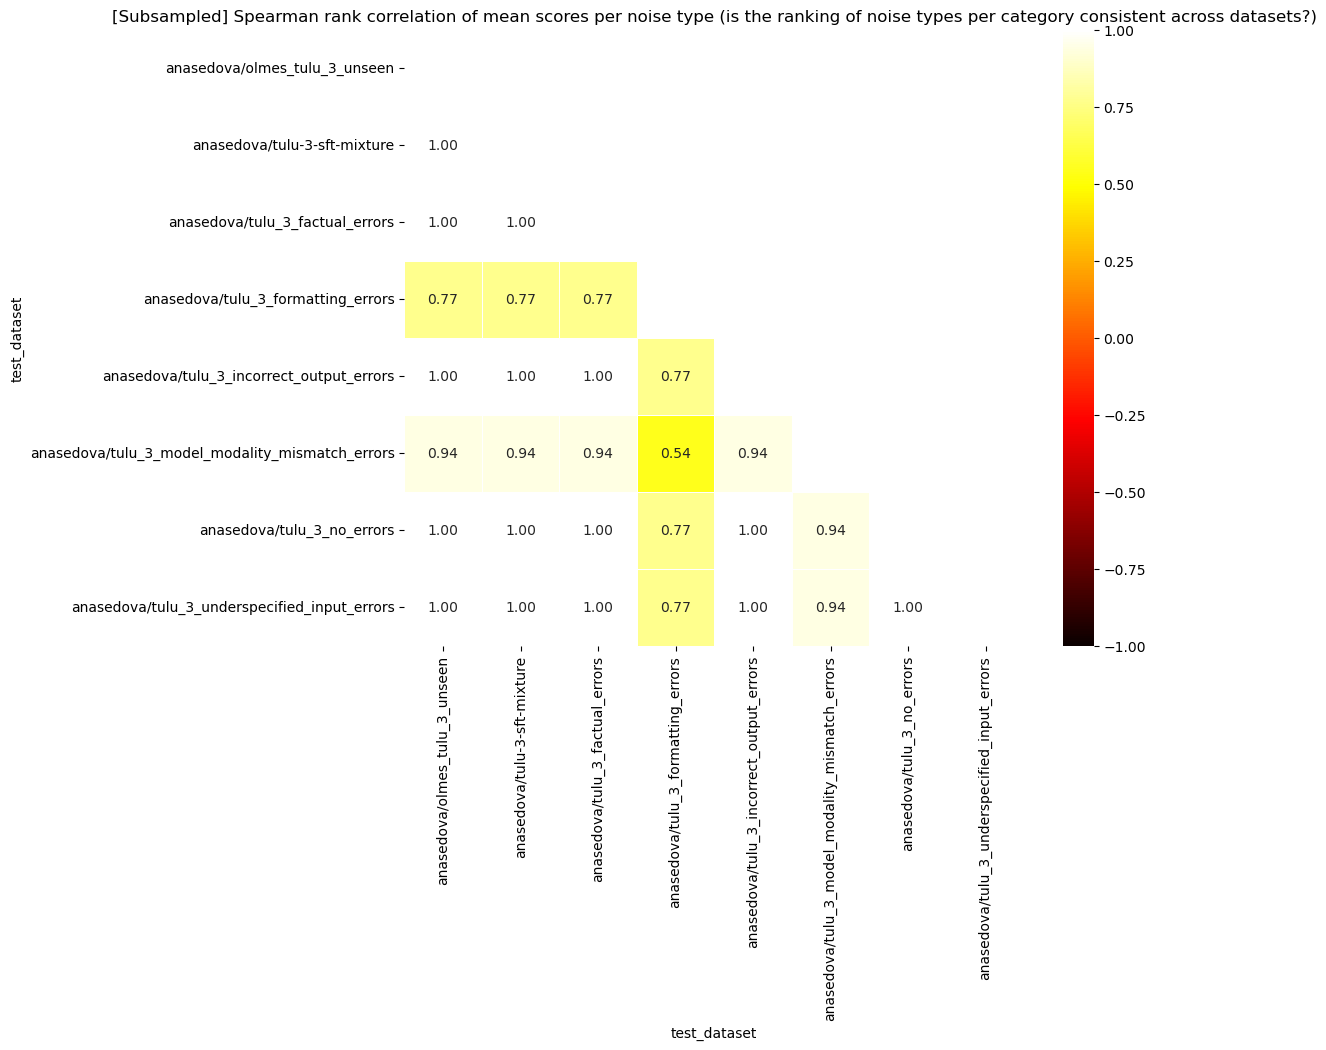

In [ ]:
spearman_corr = df.groupby("noise_type").sample(df.groupby("noise_type").size().min(),random_state=42).groupby(["test_dataset","noise_type"])["influence"].mean().reset_index().pivot(index="noise_type", columns="test_dataset", values="influence").corr(method="spearman")

plt.figure(figsize=(10, 8)) 
sns.heatmap(spearman_corr, annot=True, cmap="hot", fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, mask=np.triu(np.ones_like(spearman_corr, dtype=bool)))
plt.title("[Subsampled] Spearman rank correlation of mean scores per noise type (is the ranking of noise types per category consistent across datasets?)")

In [ ]:
df.groupby("noise_type")[['influence', 'prompt_lenght']].corr()


influence  prompt_lenght
noise_type                                                     
factual_errors          influence       1.000000      -0.076895
                        prompt_lenght  -0.076895       1.000000
formatting              influence       1.000000      -0.170283
                        prompt_lenght  -0.170283       1.000000
incorrect_output        influence       1.000000      -0.098291
                        prompt_lenght  -0.098291       1.000000
model_modality_mismatch influence       1.000000      -0.262799
                        prompt_lenght  -0.262799       1.000000
no                      influence       1.000000            NaN
                        prompt_lenght        NaN            NaN
underspecified_input    influence       1.000000      -0.058960
                        prompt_lenght  -0.058960       1.000000

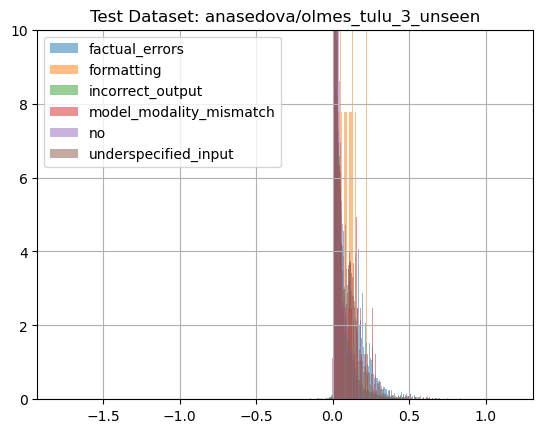

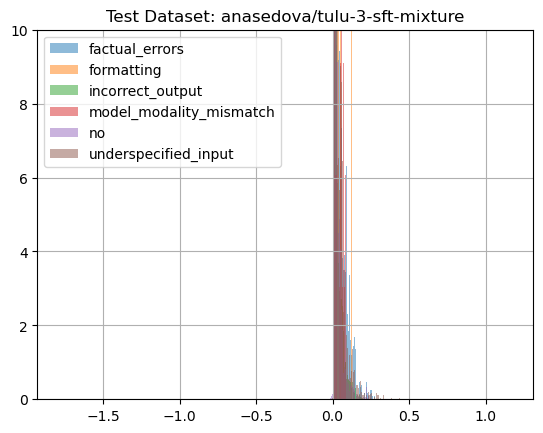

In [ ]:
import matplotlib.pyplot as plt


unique_datasets = df["test_dataset"].unique()
num_datasets = len(unique_datasets)



for ax, (name, df_) in zip(axes, df.groupby(by="test_dataset")):
    df_.groupby(by="noise_type")["influence"].hist( legend=True, bins=500, density=True, alpha=0.5)
    plt.title(f"Test Dataset: {name}")
    plt.xlim(df["influence"].min(), df["influence"].max() * 0.3)
    plt.ylim(0,10)
    plt.show()


In [ ]:
df_tulu_test_only

,id,messages,source,dataset,tulu_id,prompt,completion,noise_type,old_ordinal_id,test_dataset,influence,prompt_lenght
0,oasst1_5921,[{'content': 'Create a snippet of Terraform HC...,ai2-adapt-dev/oasst1_converted,None,oasst1_5921,Create a snippet of Terraform HCL code that cr...,"Sure, here's an example Terraform HCL code tha...",underspecified_input,0.0,anasedova/tulu_3_factual_errors,0.018311,24.0
1,oasst1_1096,[{'content': '¿Por qué crees que cada año es m...,ai2-adapt-dev/oasst1_converted,None,NaN,NaN,NaN,no,NaN,anasedova/tulu_3_factual_errors,0.034180,91.0
2,oasst1_1752,[{'content': 'Nenn mir einen lustigen Witz übe...,ai2-adapt-dev/oasst1_converted,None,oasst1_1752,Nenn mir einen lustigen Witz über Polen.,Was ist die am wenigsten besuchte Einrichtung ...,incorrect_output,2.0,anasedova/tulu_3_factual_errors,0.259766,7.0
3,oasst1_2492,[{'content': 'Cuál es equivalente a una bombil...,ai2-adapt-dev/oasst1_converted,None,NaN,NaN,NaN,no,NaN,anasedova/tulu_3_factual_errors,0.049072,91.0
4,oasst1_4628,[{'content': 'Com es fa una truita de patates?...,ai2-adapt-dev/oasst1_converted,None,NaN,NaN,NaN,no,NaN,anasedova/tulu_3_factual_errors,0.038818,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7514747,hard_coded_19,[{'content': 'Draw me an ASCII art logo for yo...,None,hard_coded,hard_coded_19,Draw me an ASCII art logo for yourself.,____o__ __o____ o ...,incorrect_output,938373.0,anasedova/tulu-3-sft-mixture,0.036133,8.0
7514748,hard_coded_20,"[{'content': 'Draw me an ASCII art for Ai2.', ...",None,hard_coded,hard_coded_20,Draw me an ASCII art for Ai2.,$$$$$$\ $$\ $$$$$$\ \n$$ __$$\ \__|$$ __...,incorrect_output,938489.0,anasedova/tulu-3-sft-mixture,0.046631,7.0
7514749,hard_coded_21,"[{'content': 'What is your favorite drink?', '...",None,hard_coded,hard_coded_21,What is your favorite drink?,I'm just a language model and don't have drink...,incorrect_output,938536.0,anasedova/tulu-3-sft-mixture,0.134766,5.0
7514750,hard_coded_22,"[{'content': 'Hi, how are you?', 'role': 'user...",None,hard_coded,NaN,NaN,NaN,no,NaN,anasedova/tulu-3-sft-mixture,0.231445,91.0


In [ ]:
# ANOVA
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols("influence ~ C(noise_type)", data=df_tulu_test_only).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                   sum_sq        df            F  PR(>F)
C(noise_type)   21.913791       5.0  5634.734757     0.0
Residual       730.627357  939338.0          NaN     NaN


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey_results = pairwise_tukeyhsd(df_tulu_test_only["influence"], df_tulu_test_only["noise_type"], alpha=0.05)

print(tukey_results)


                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                  group2         meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------
         factual_errors              formatting  -0.0183    0.0  -0.025 -0.0115   True
         factual_errors        incorrect_output  -0.0275    0.0 -0.0281 -0.0269   True
         factual_errors model_modality_mismatch  -0.0227    0.0 -0.0253 -0.0201   True
         factual_errors                      no  -0.0241    0.0 -0.0247 -0.0235   True
         factual_errors    underspecified_input  -0.0105    0.0 -0.0112 -0.0098   True
             formatting        incorrect_output  -0.0093 0.0013  -0.016 -0.0025   True
             formatting model_modality_mismatch  -0.0045 0.4847 -0.0117  0.0027  False
             formatting                      no  -0.0059 0.1284 -0.0126  0.0009  False
             formatting    underspecified_i

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for name, df_ in df.groupby(by="test_dataset"):
    tukey_results = pairwise_tukeyhsd(df_["influence"], df_["noise_type"], alpha=0.05)
    print(name)
    print(tukey_results)


anasedova/olmes_tulu_3_unseen
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                  group2         meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------
         factual_errors              formatting   -0.036    0.0 -0.0515 -0.0206   True
         factual_errors        incorrect_output  -0.0609    0.0 -0.0623 -0.0596   True
         factual_errors model_modality_mismatch  -0.0484    0.0 -0.0543 -0.0425   True
         factual_errors                      no   -0.053    0.0 -0.0544 -0.0517   True
         factual_errors    underspecified_input  -0.0229    0.0 -0.0246 -0.0213   True
             formatting        incorrect_output  -0.0249 0.0001 -0.0402 -0.0095   True
             formatting model_modality_mismatch  -0.0124 0.2596 -0.0288   0.004  False
             formatting                      no   -0.017 0.0202 -0.0323 -0.0016   True
             

In [ ]:
df